In [1]:
from jia_sims import *

In [4]:
model = LFI(["field"], [r"$M_\nu$",r"$\Omega_m$",r"$\sigma_8$"], kernel_size = 3, strides = 2, model_dir='/global/scratch/avirukt/models/noiseless-b28f5ff')
test_fn = input_fn("noiseless",10)
tp = tile(p,(10,1))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/scratch/avirukt/models/noiseless-b28f5ff', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b0a5f280080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless-b28f5ff/model.ckpt-19788
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


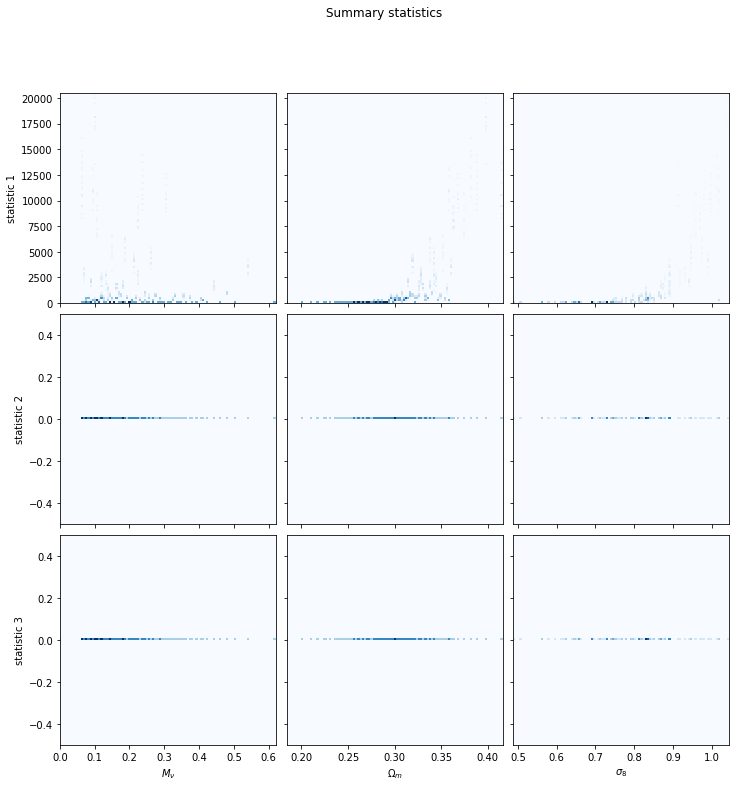

In [5]:
model.plot_summaries(testing_fn=test_fn,p=tp)

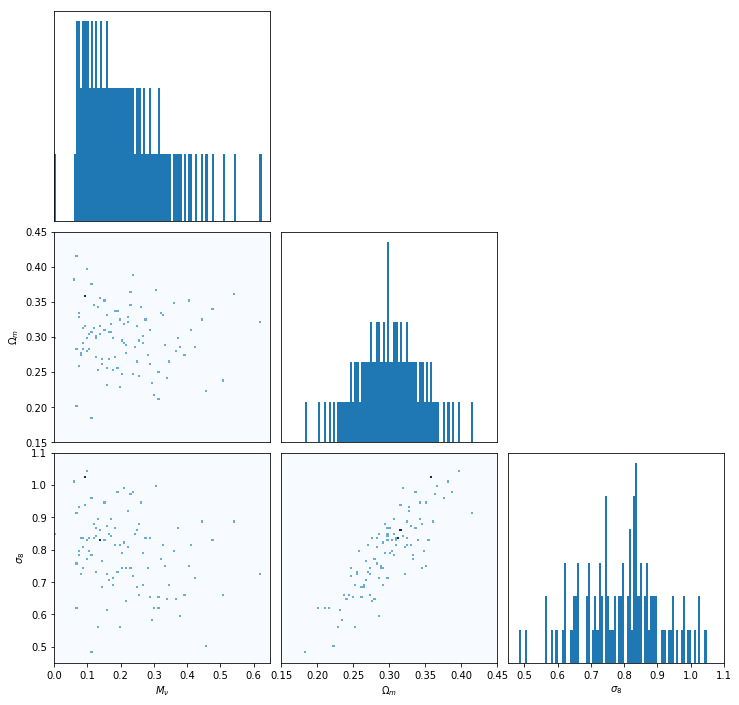

In [6]:
triangle_plot(p, model.labels, bounds=bounds)

In [7]:
post = model.plot_posteriors(testing_fn=test_fn,p=tp,bounds=bounds)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless-b28f5ff/model.ckpt-19788
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


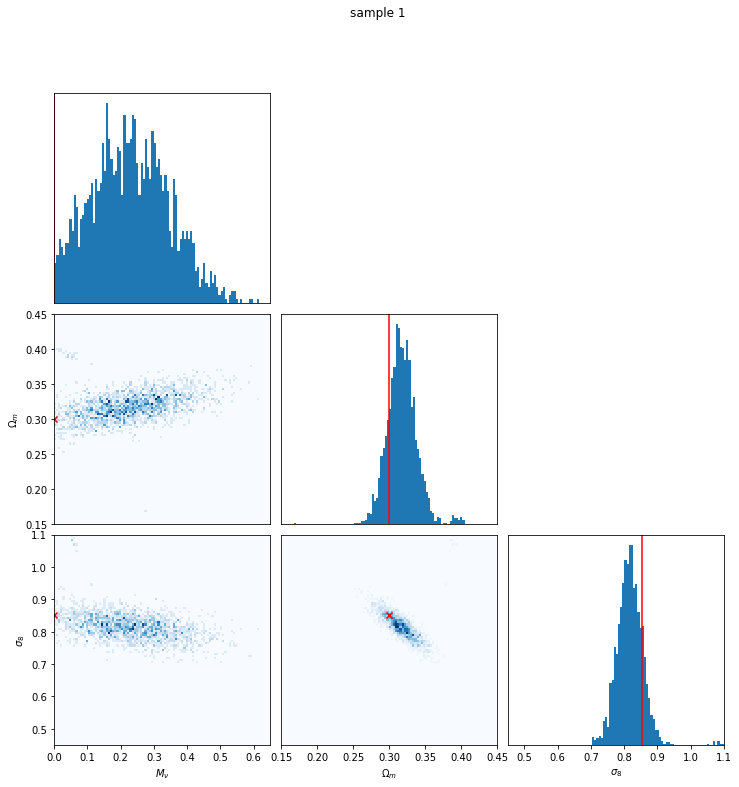

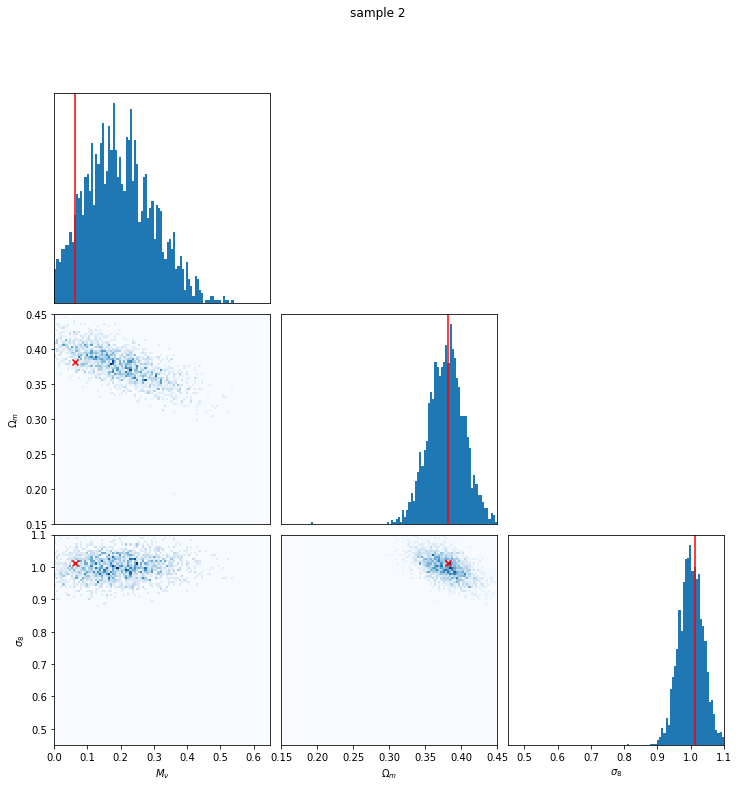

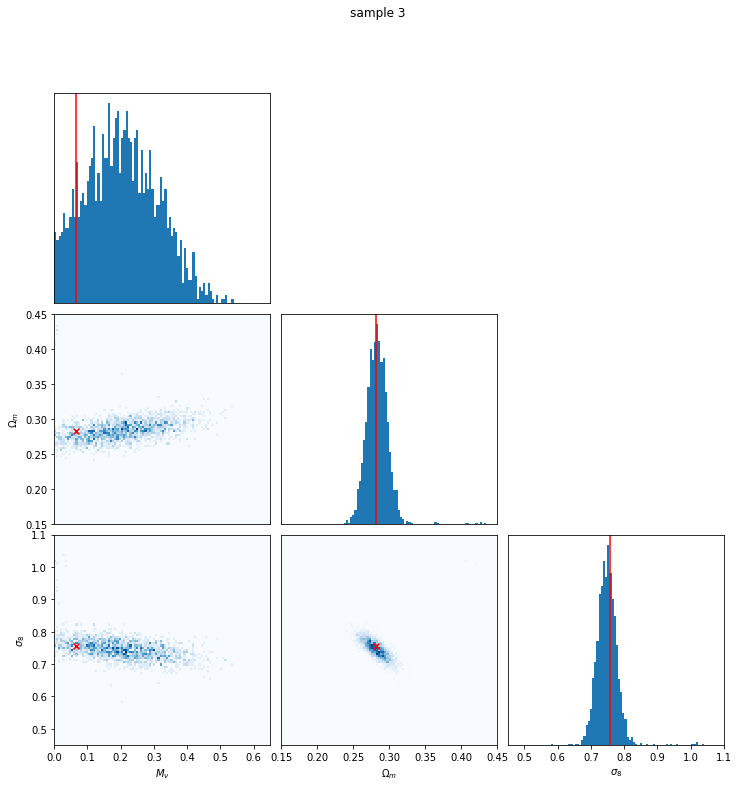

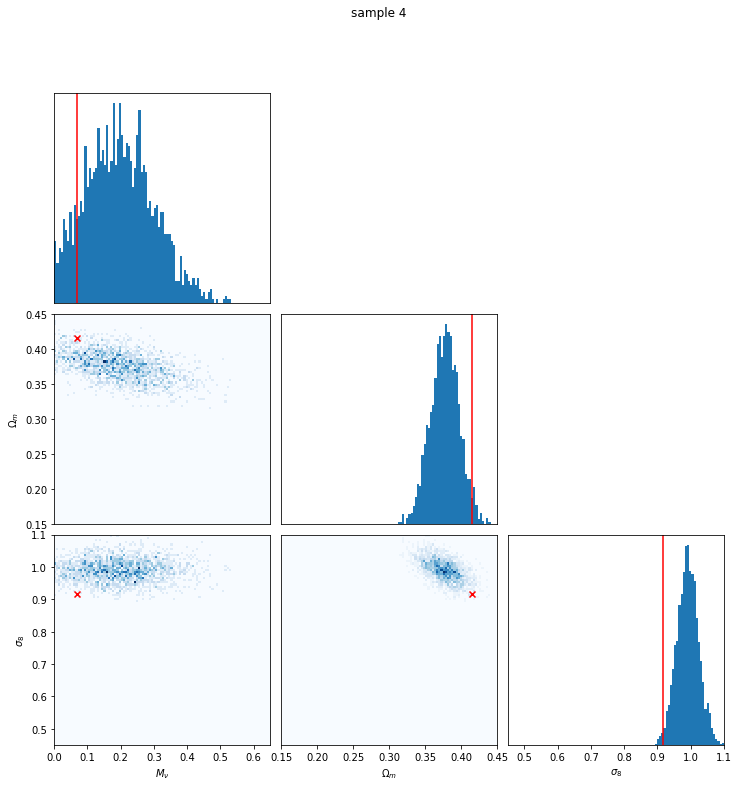

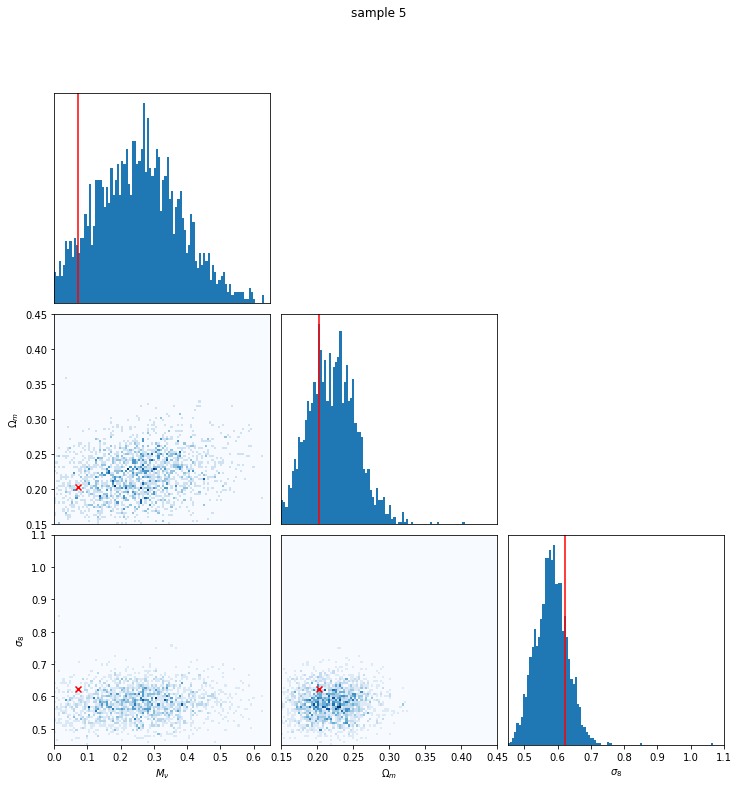

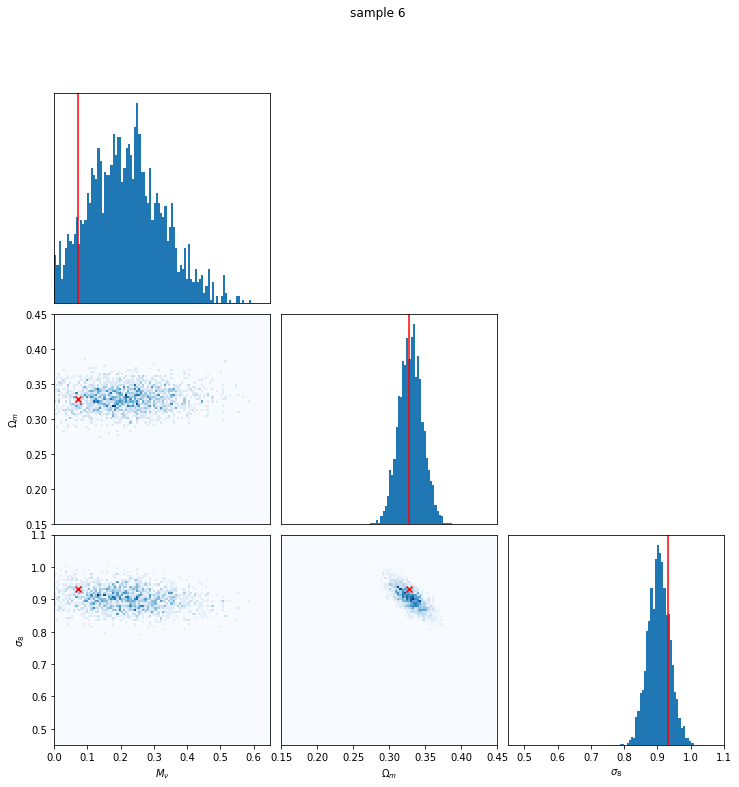

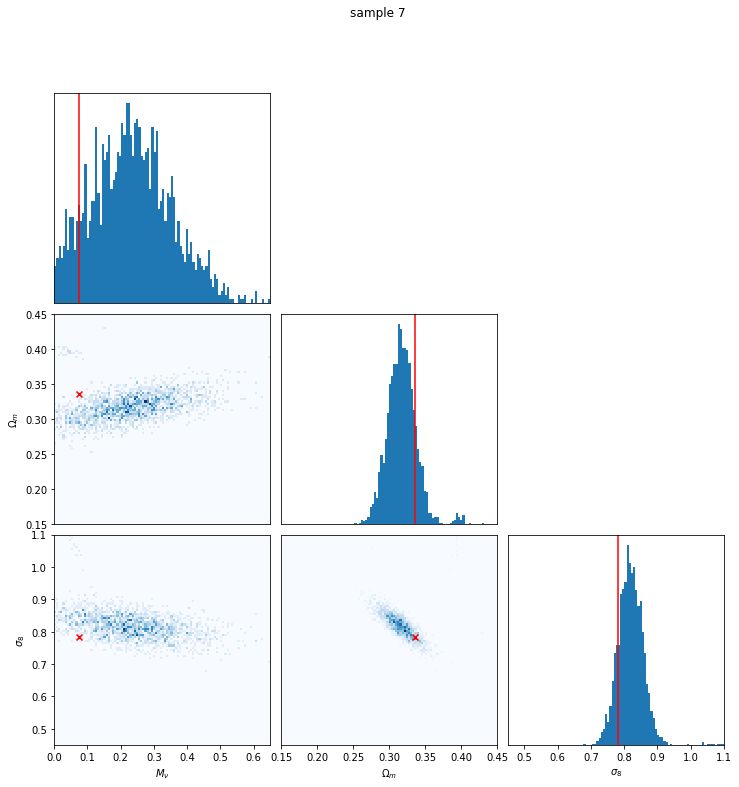

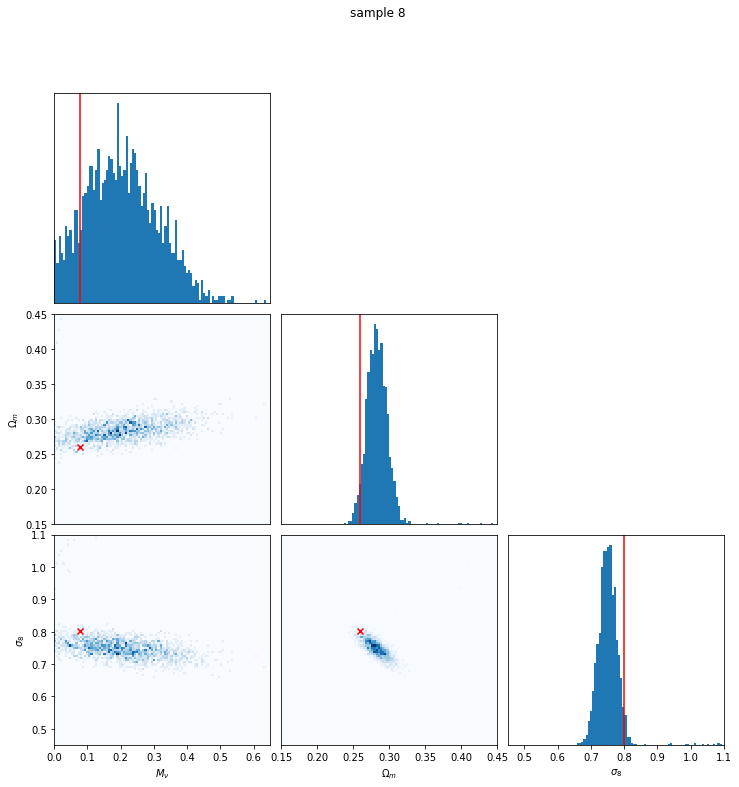

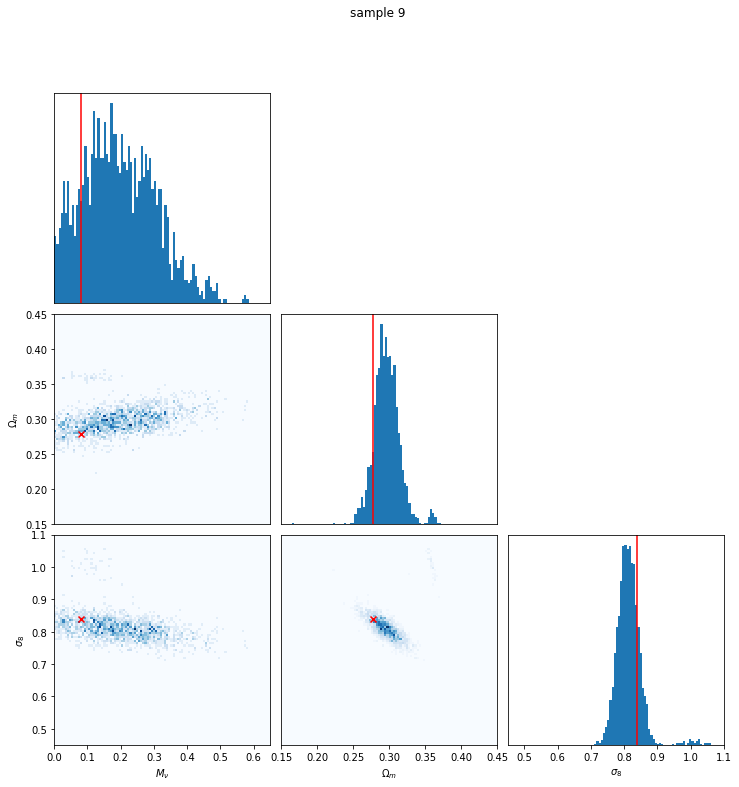

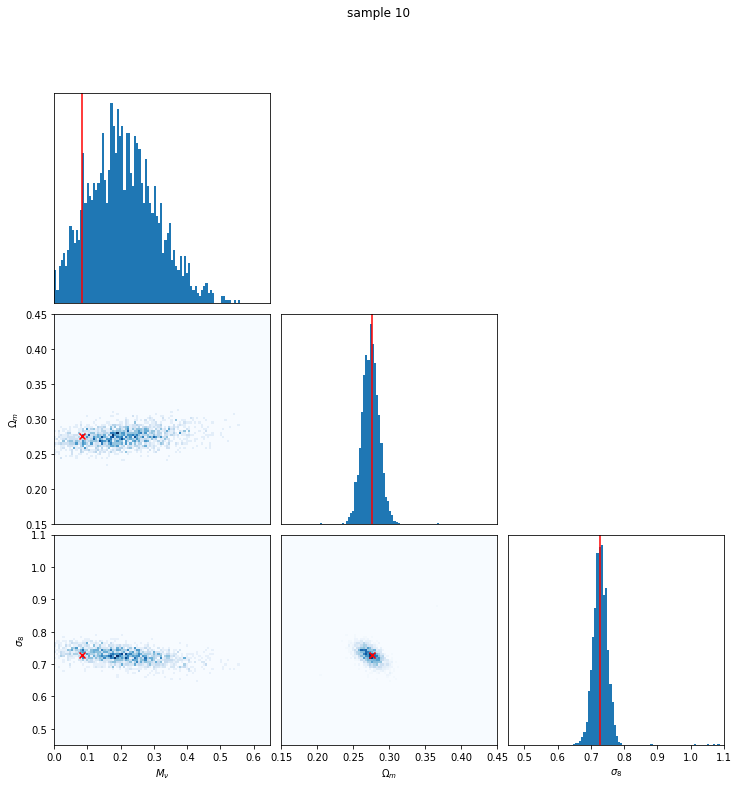

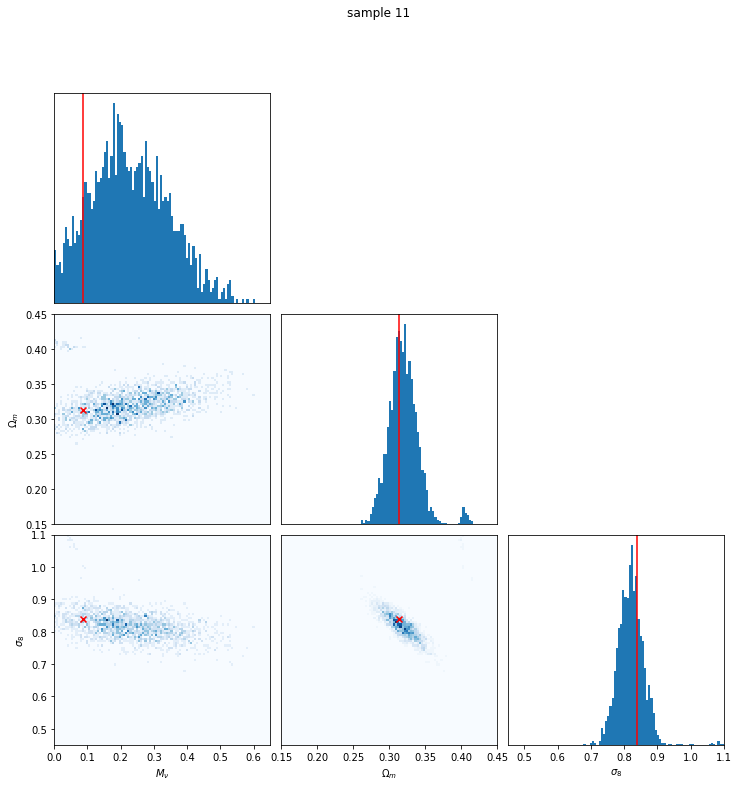

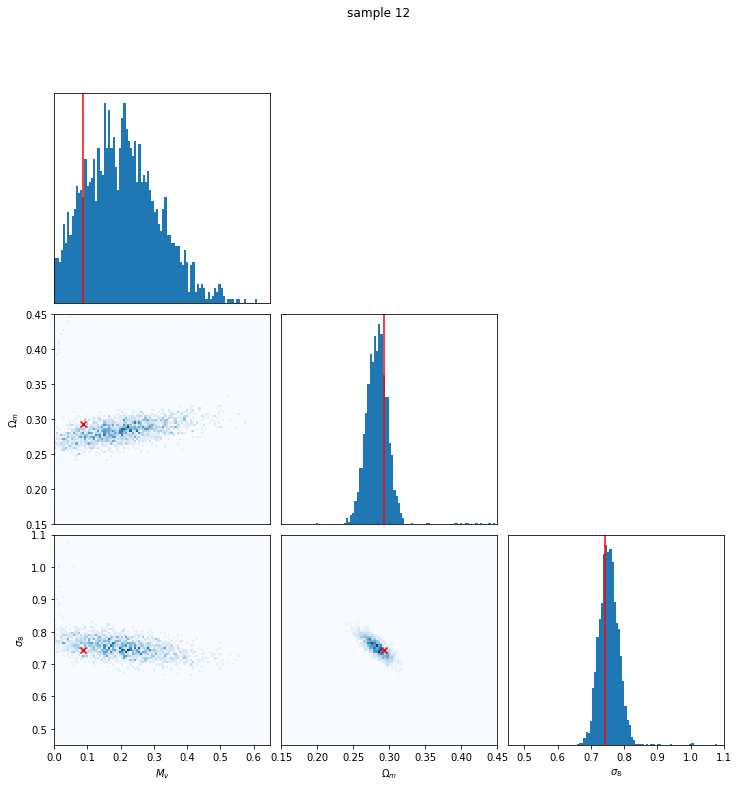

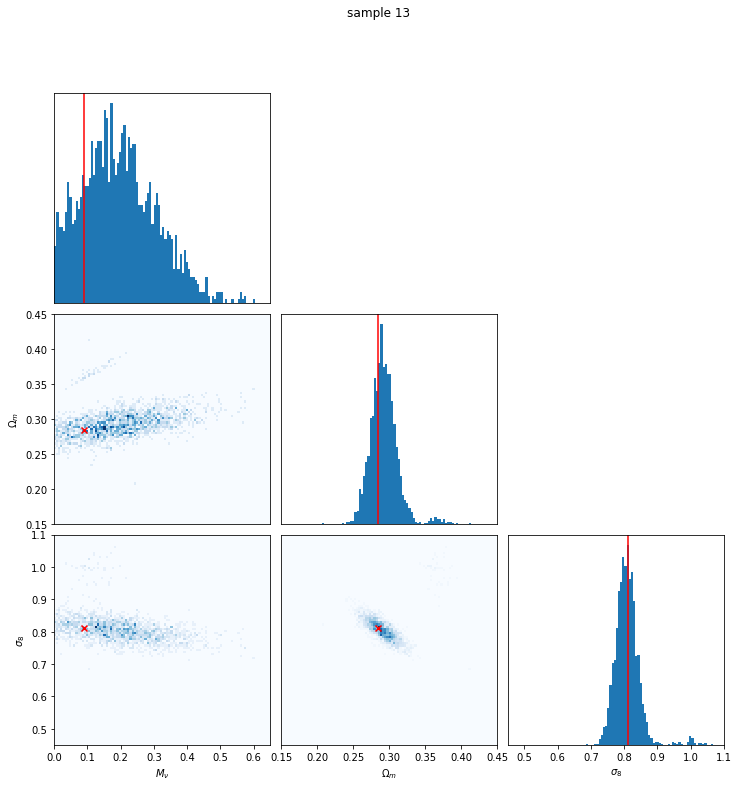

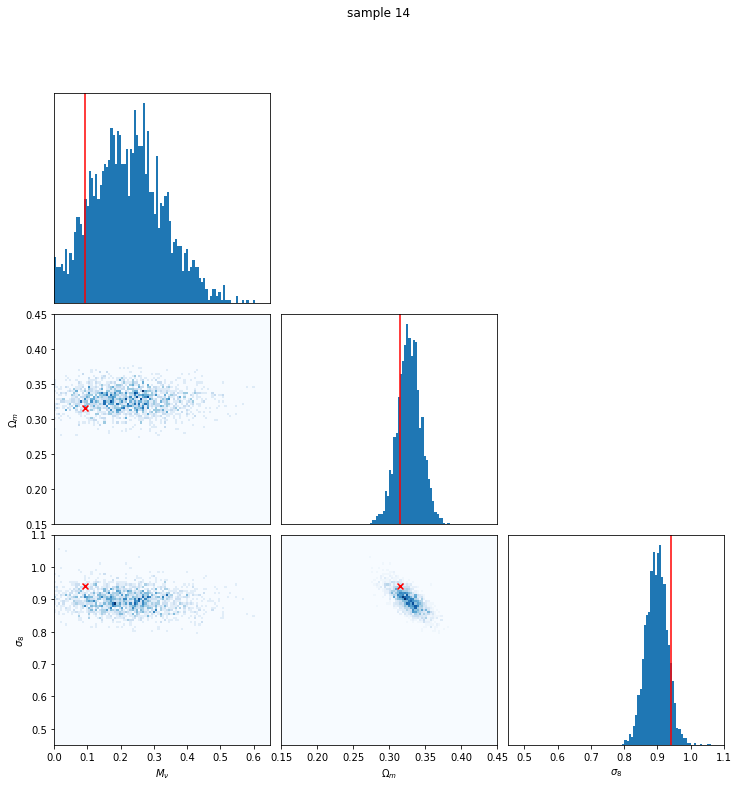

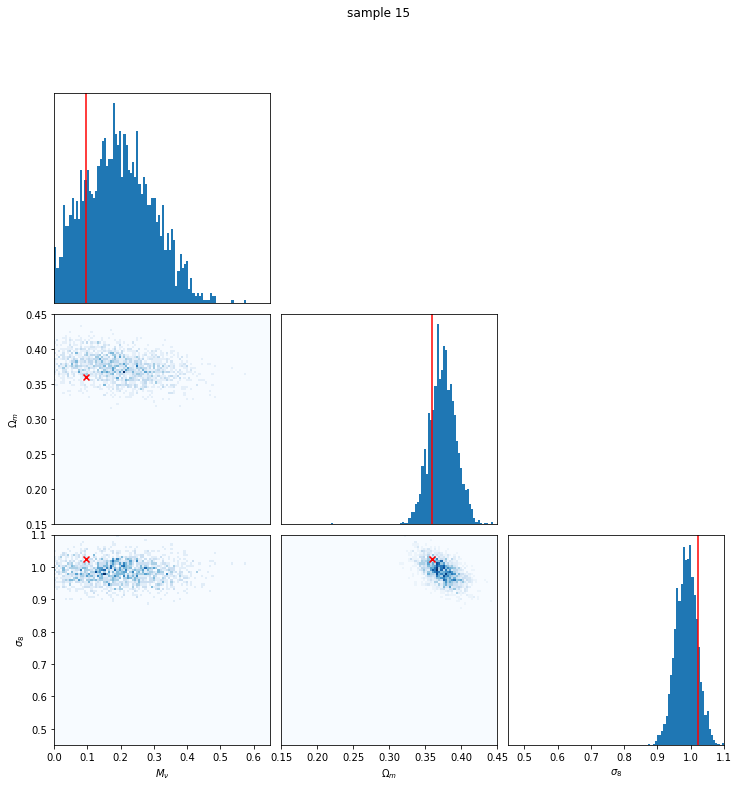

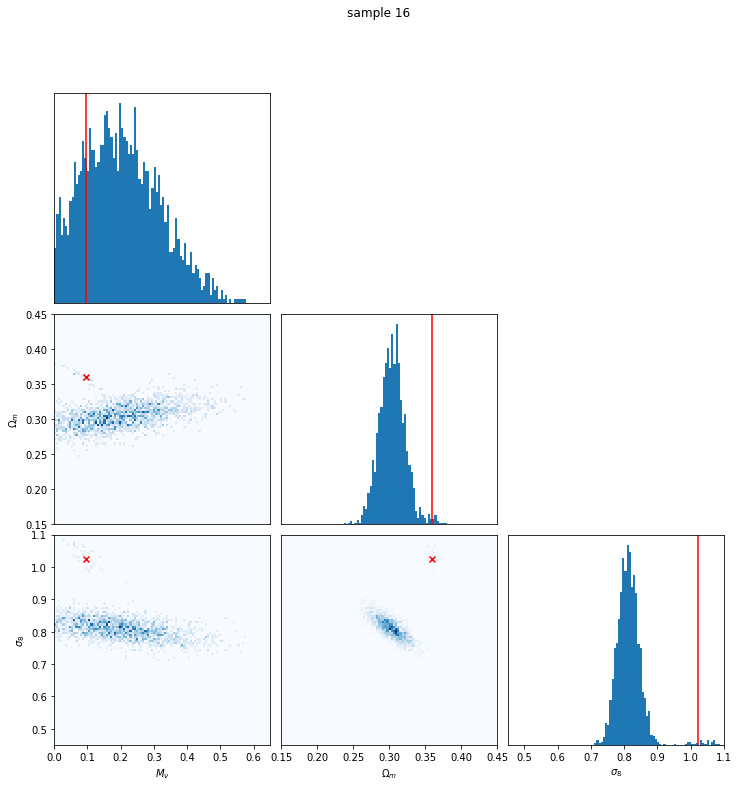

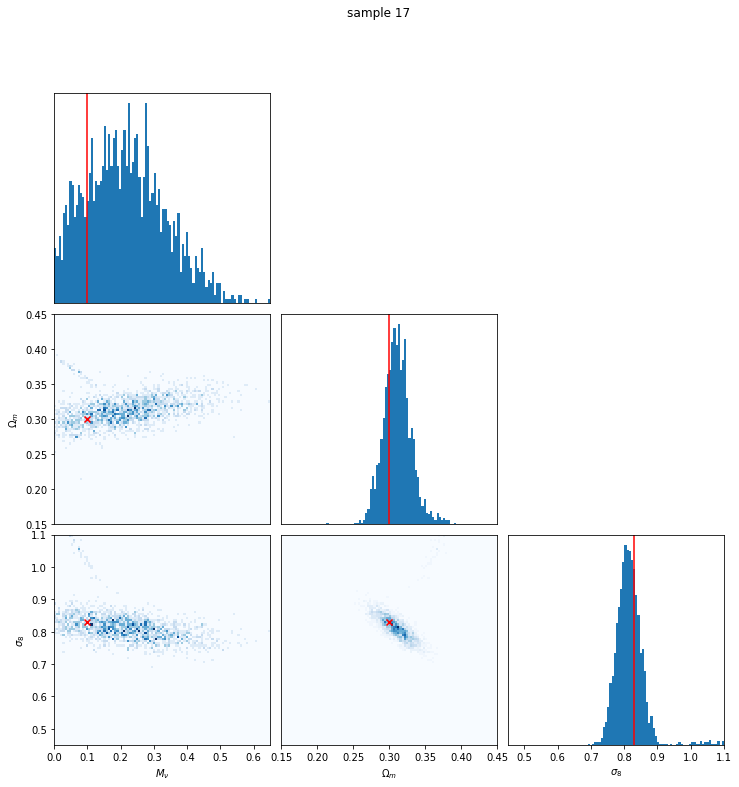

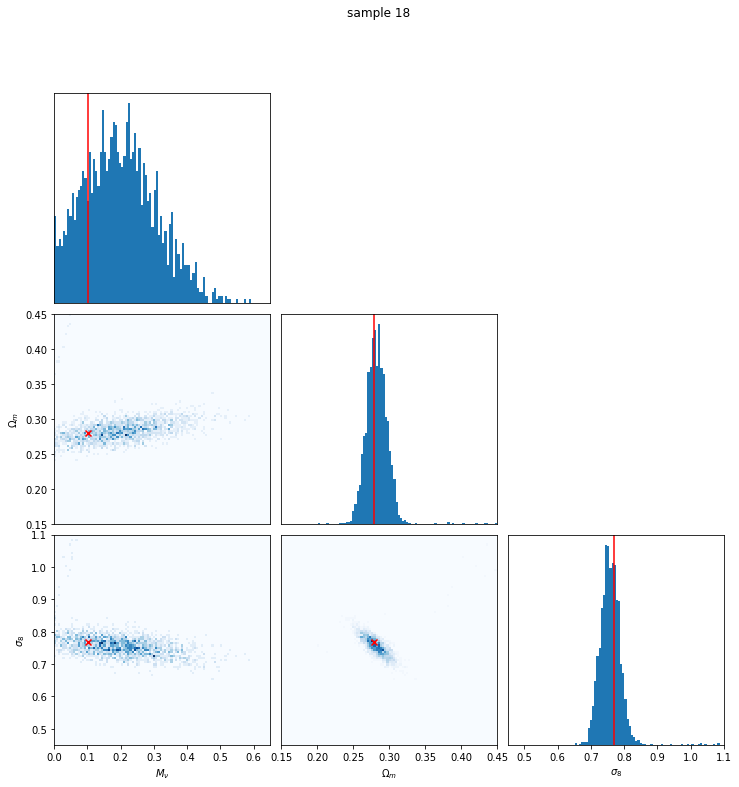

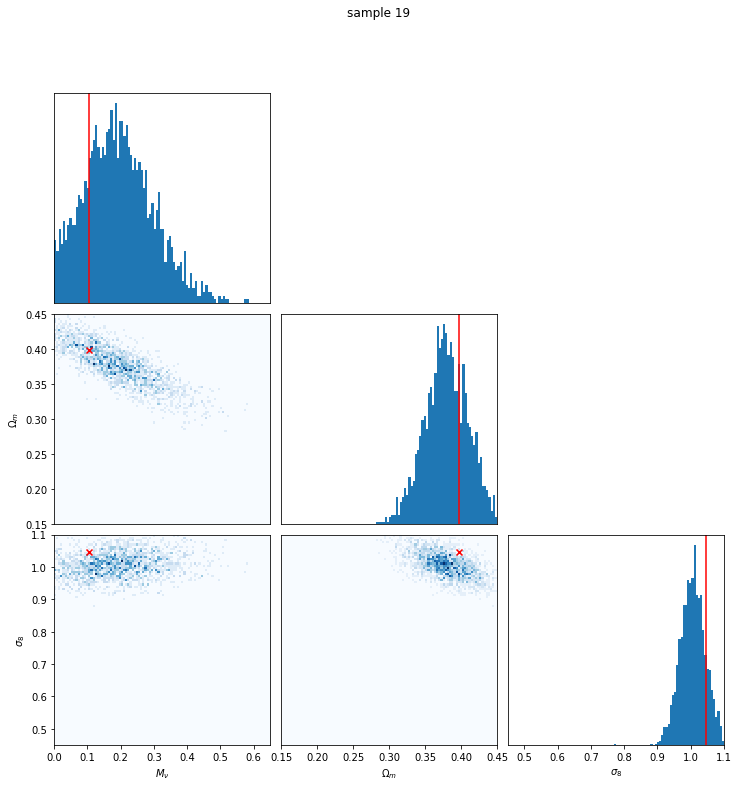

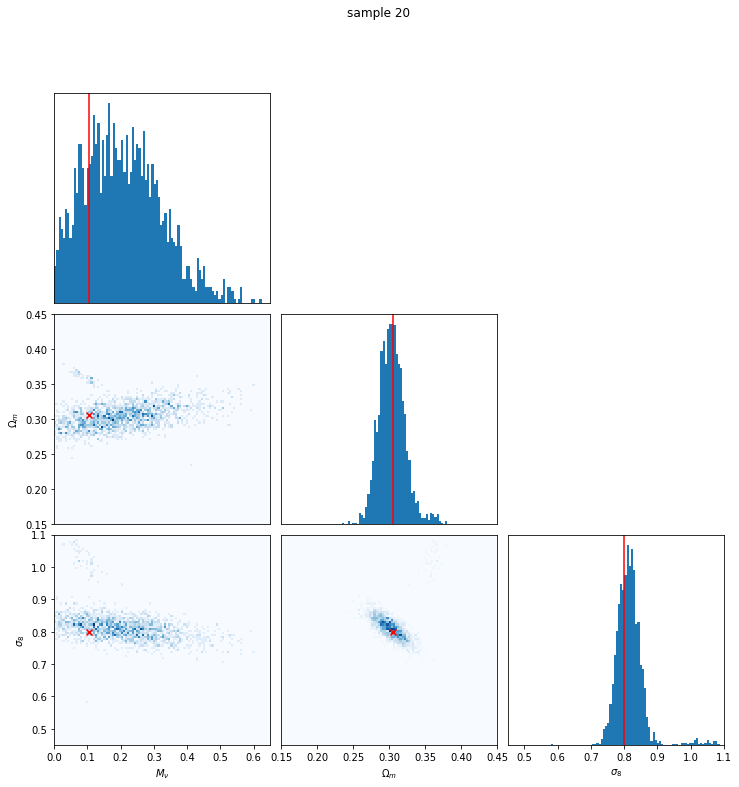

In [8]:
for i in range(20):
    next(post)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless-b28f5ff/model.ckpt-19788
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


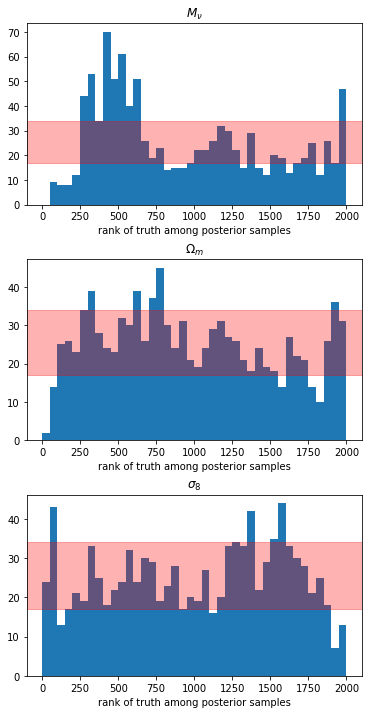

In [9]:
model.plot_ranks(testing_fn=test_fn,p=tp)

In [10]:
model = LFI(["field"], [r"$M_\nu$",r"$\Omega_m$",r"$\sigma_8$"], kernel_size = 3, strides = 2, model_dir='/global/scratch/avirukt/models/noiseless_gaussian-b28f5ff')
test_fn = input_fn("noiseless_gaussian",10)
tp = tile(p,(10,1))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/scratch/avirukt/models/noiseless_gaussian-b28f5ff', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b0d91de0358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_gaussian-b28f5ff/model.ckpt-19861
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


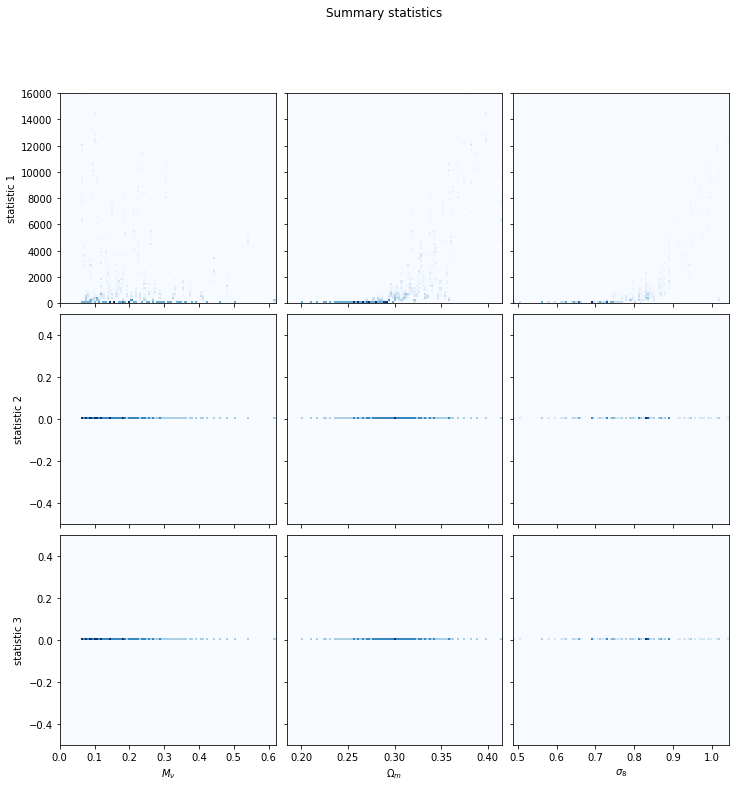

In [11]:
model.plot_summaries(testing_fn=test_fn,p=tp)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_gaussian-b28f5ff/model.ckpt-19861
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


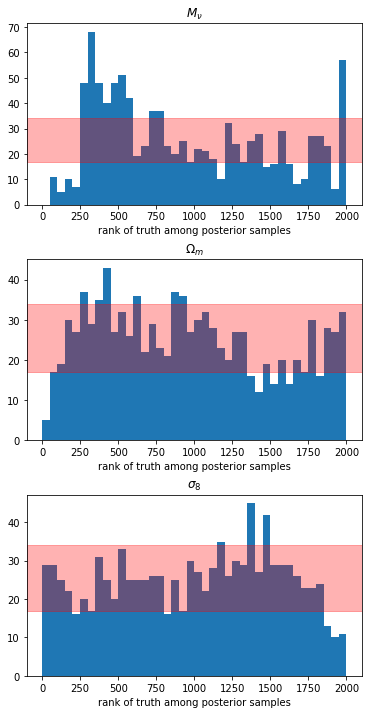

In [12]:
model.plot_ranks(testing_fn=test_fn,p=tp)

In [13]:
post = model.plot_posteriors(testing_fn=test_fn,p=tp,bounds=bounds)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_gaussian-b28f5ff/model.ckpt-19861
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


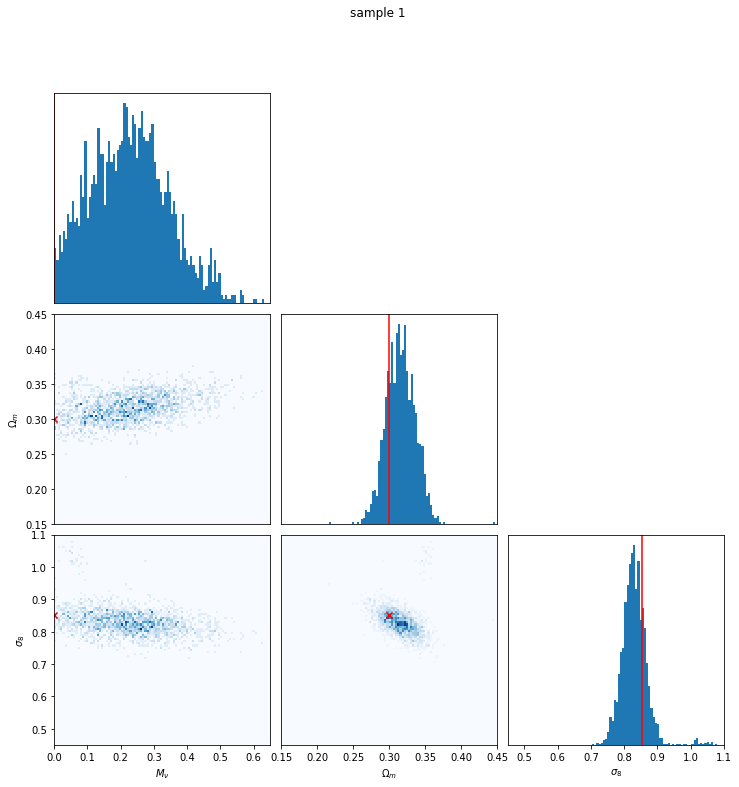

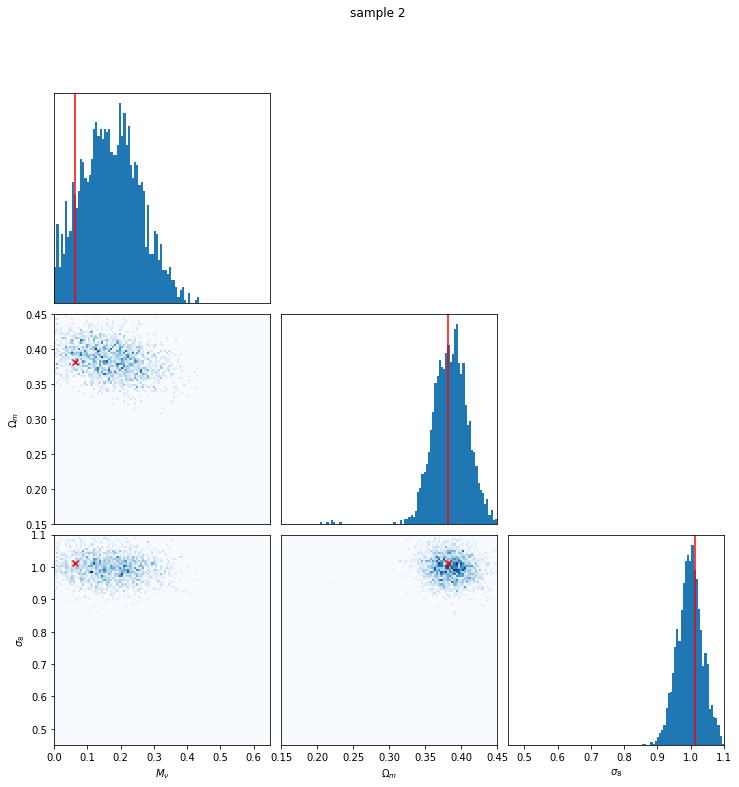

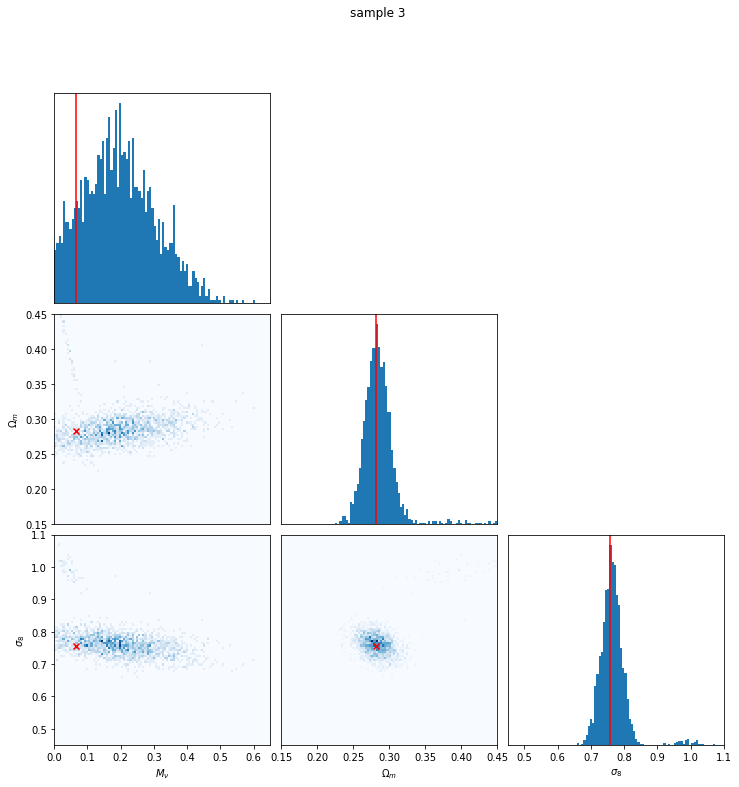

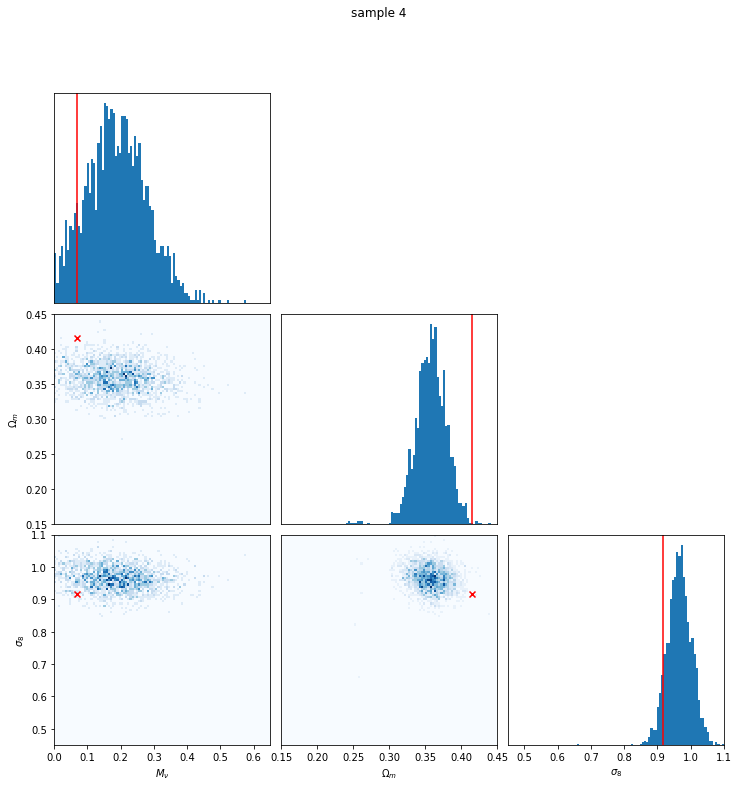

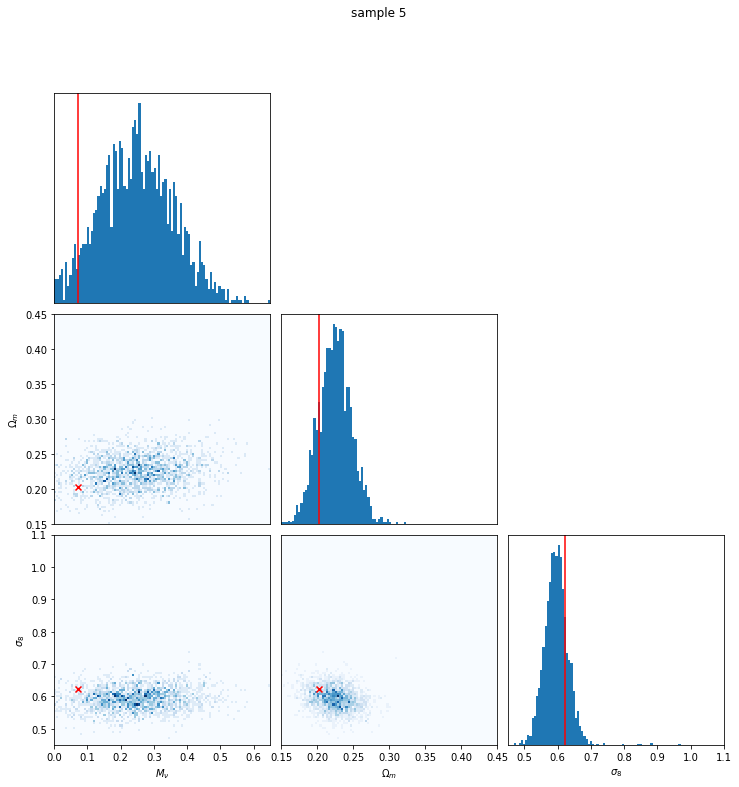

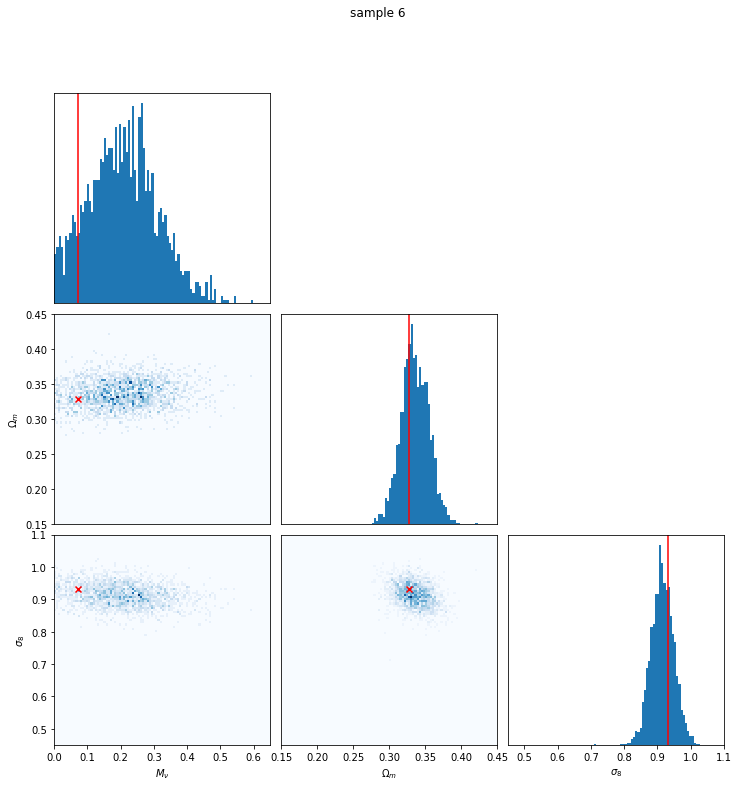

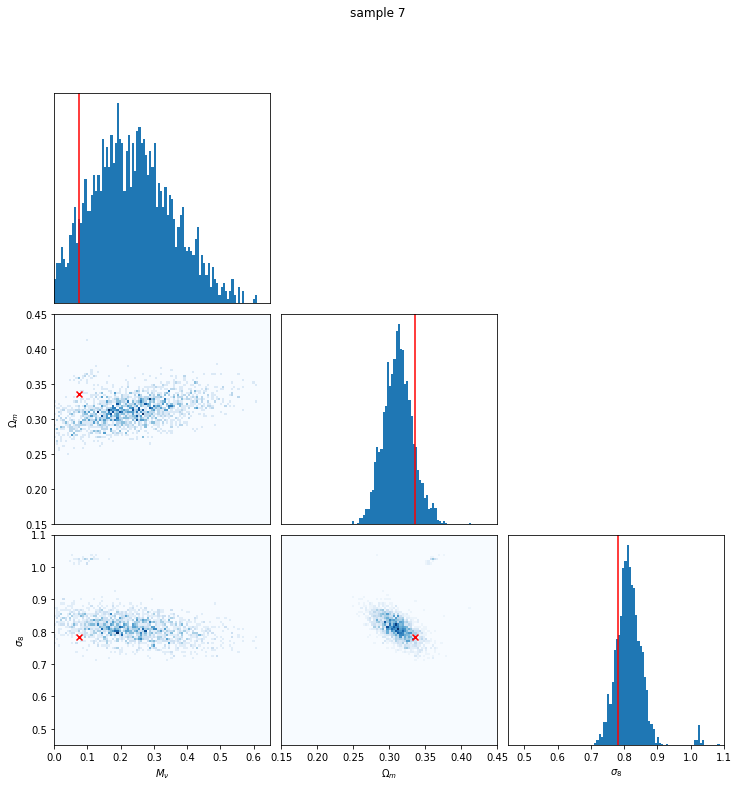

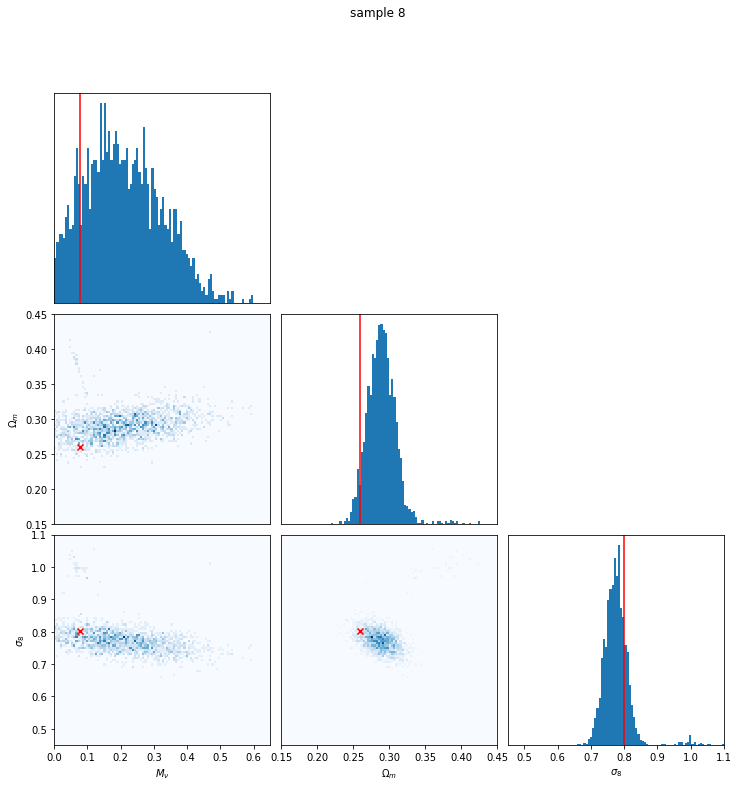

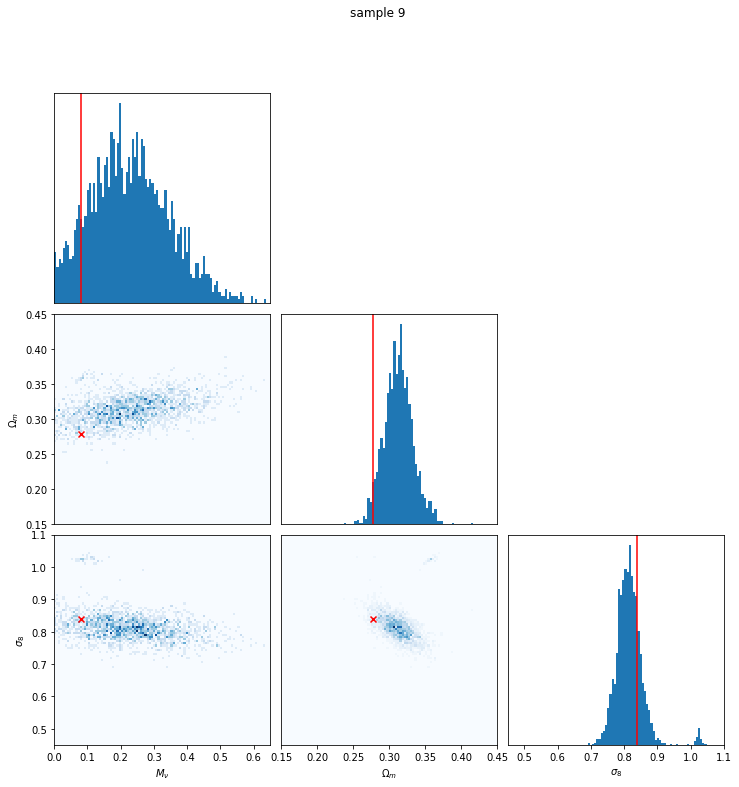

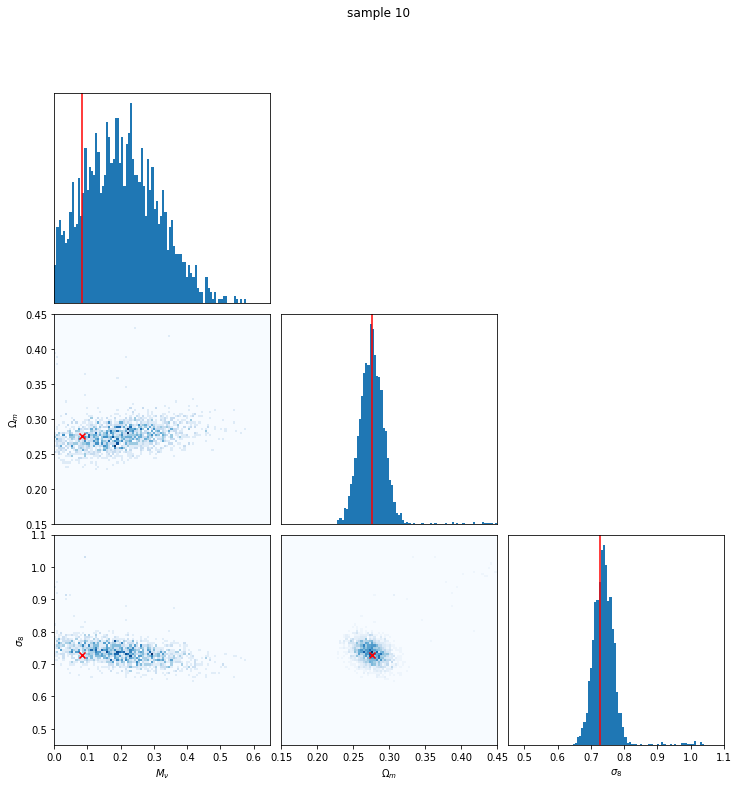

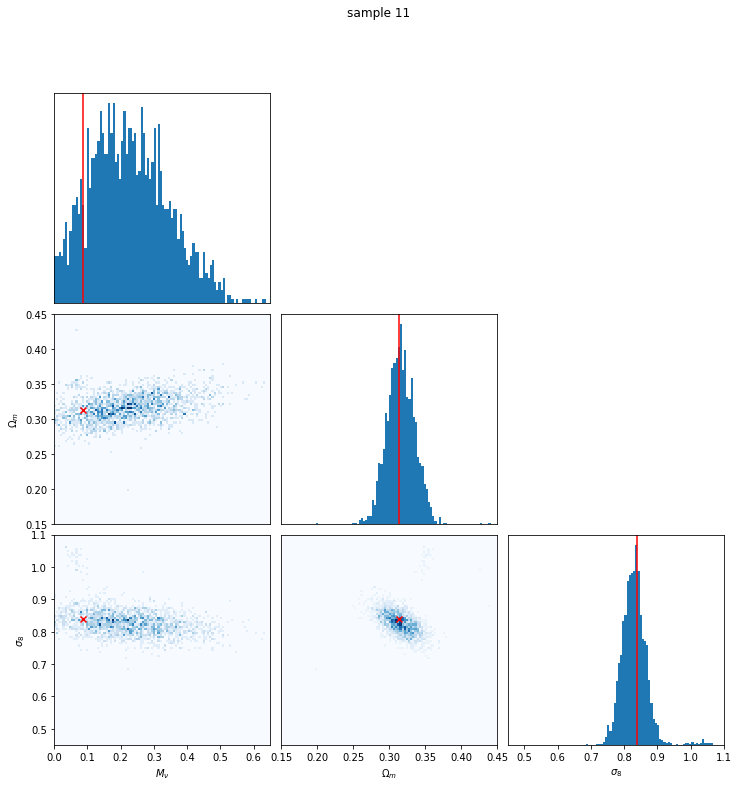

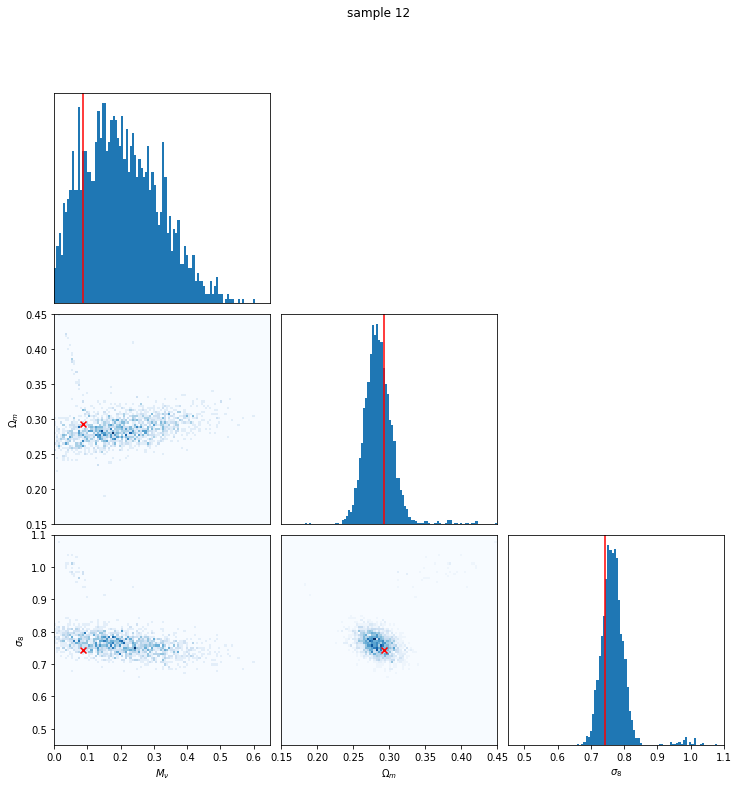

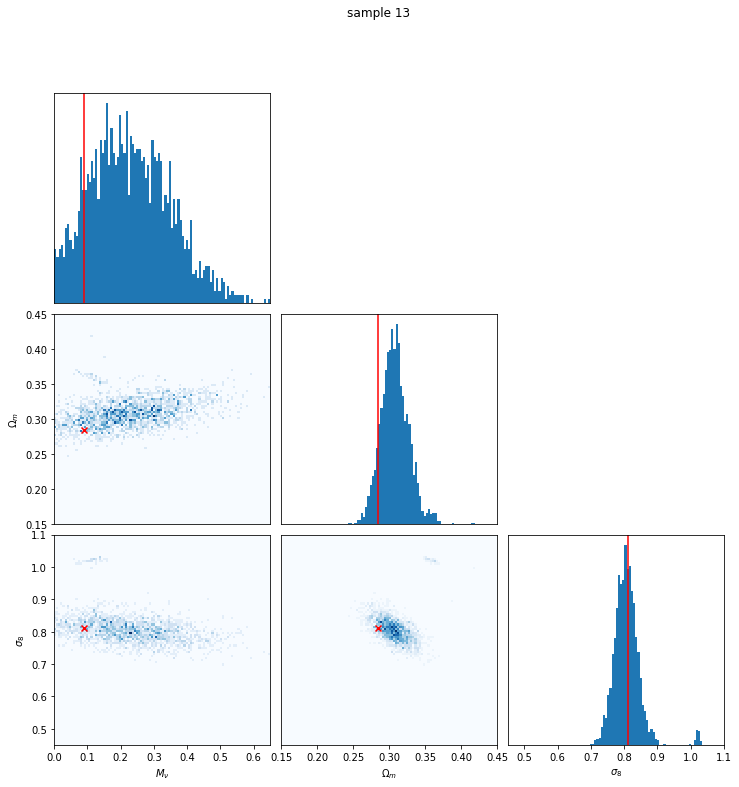

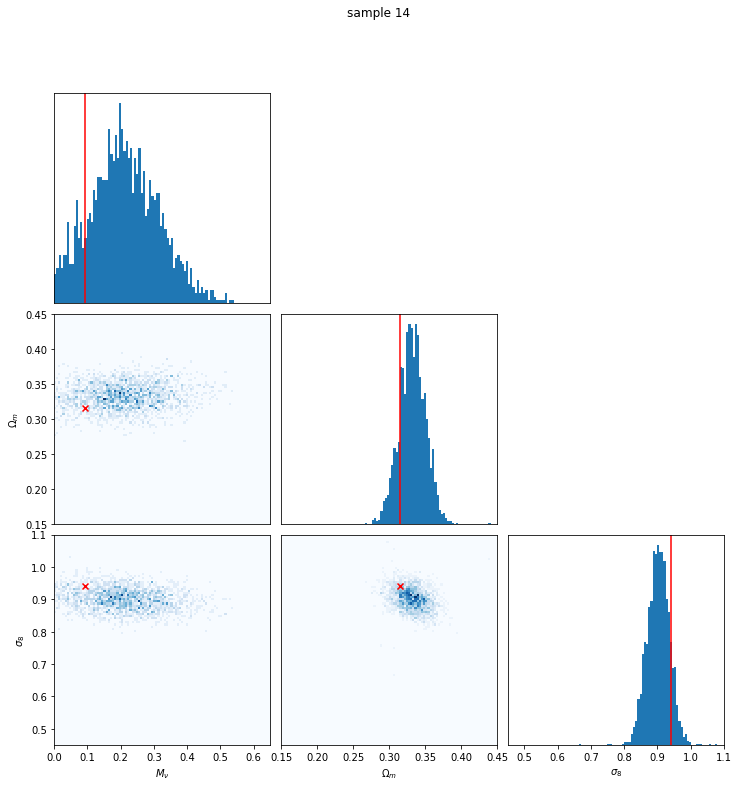

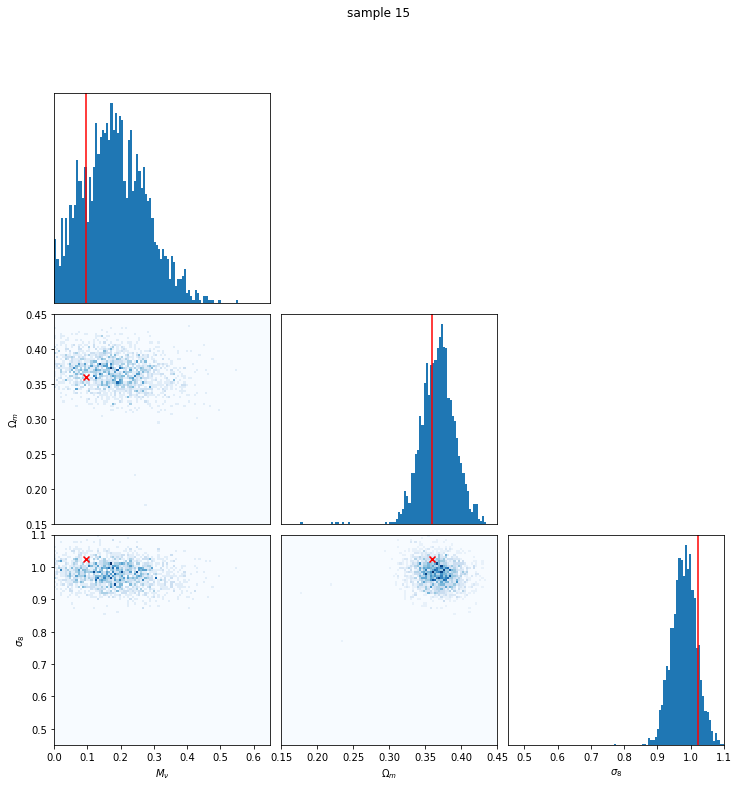

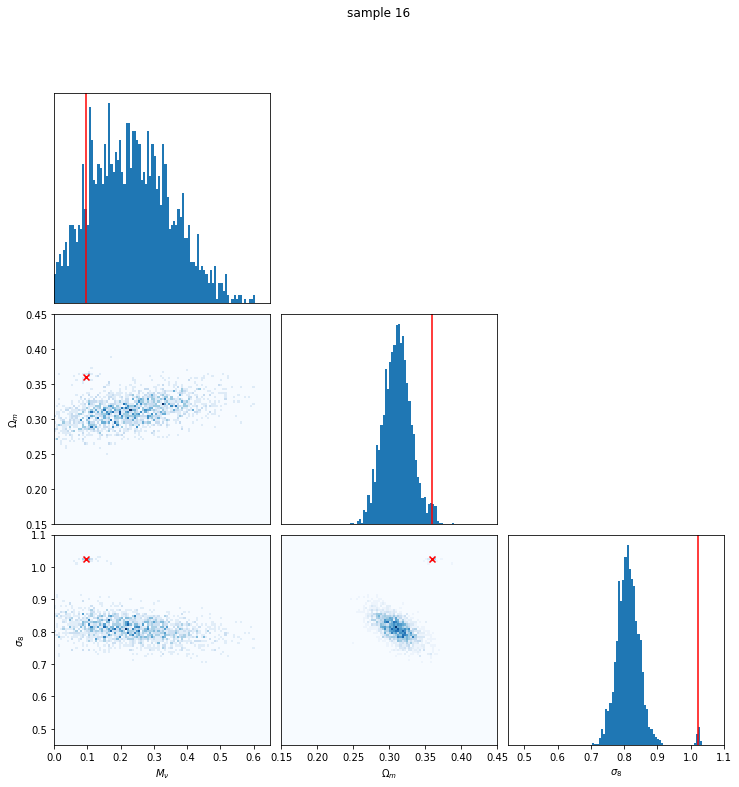

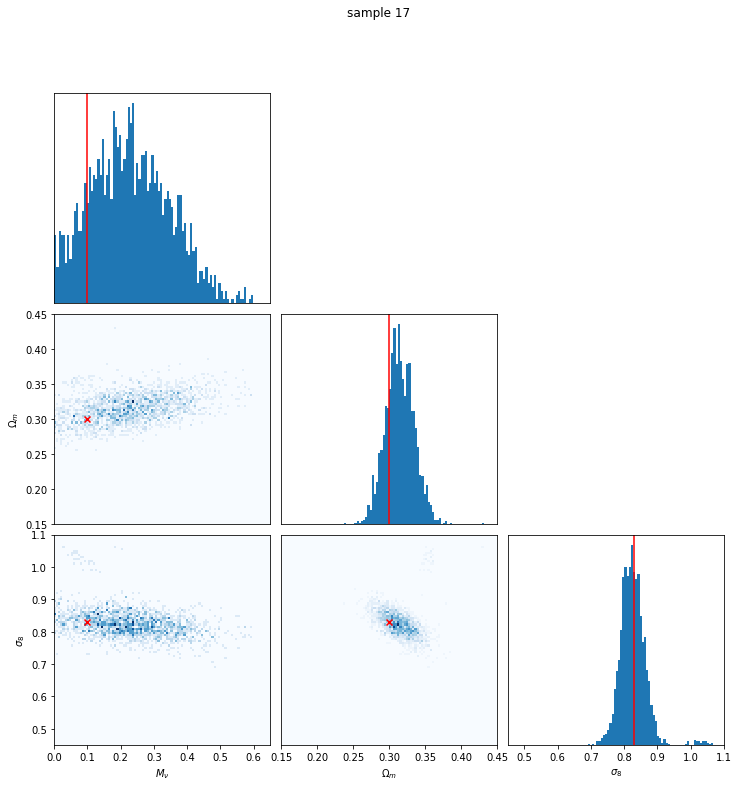

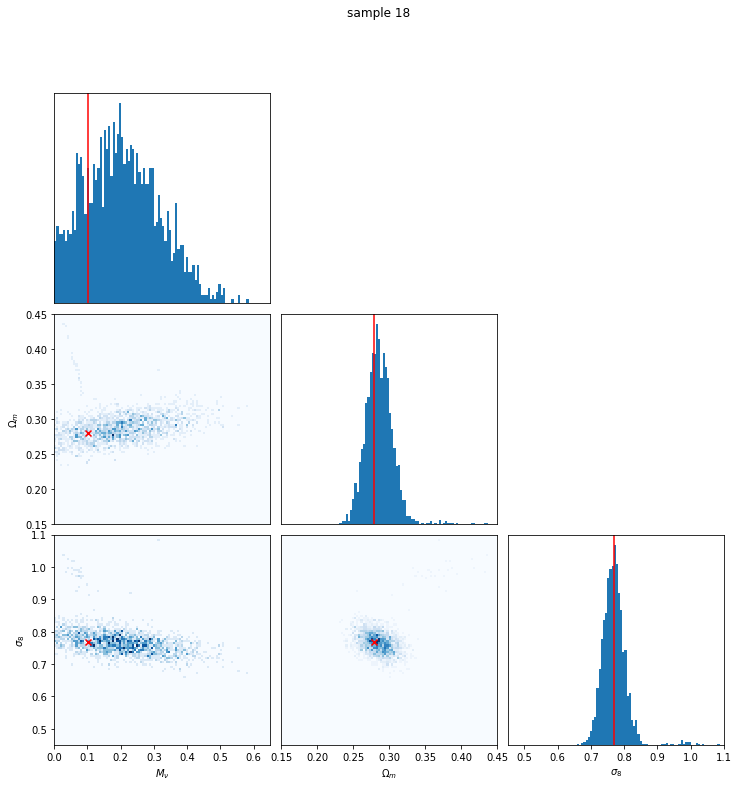

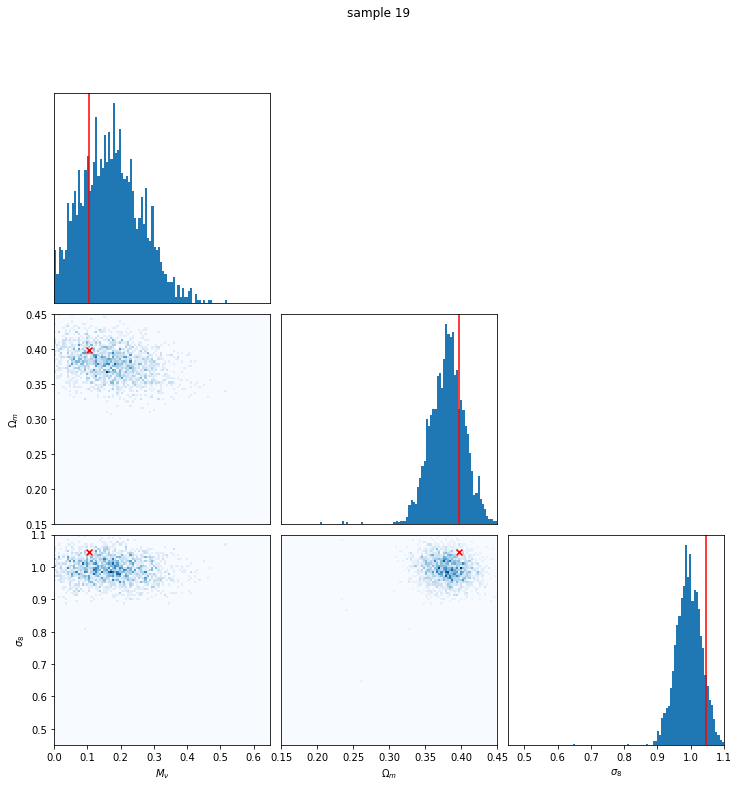

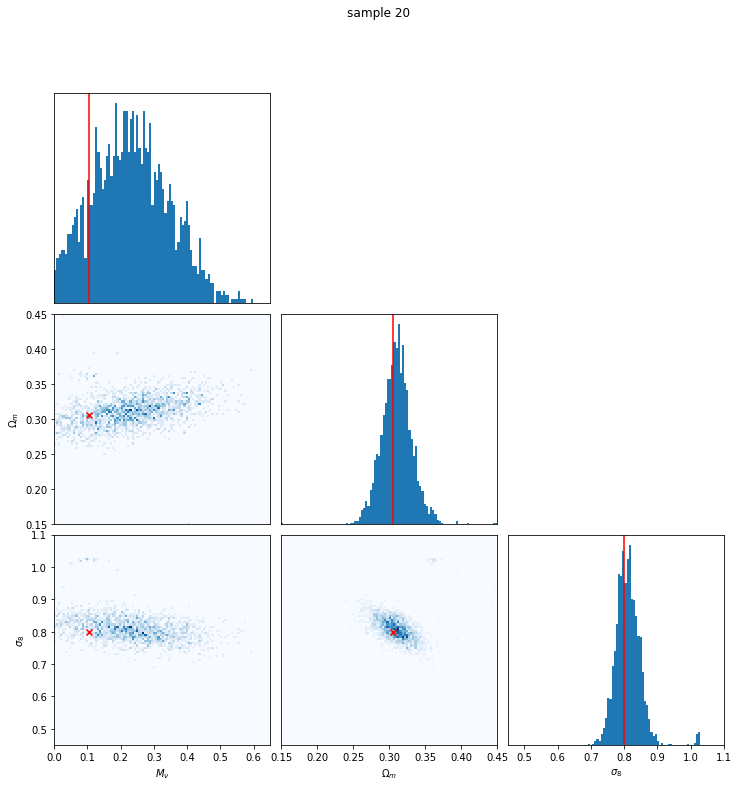

In [14]:
for i in range(20):
    next(post)

In [15]:
model = LFI(["field"], [r"$M_\nu$",r"$\Omega_m$",r"$\sigma_8$"], kernel_size = 3, strides = 2, model_dir='/global/scratch/avirukt/models/noiseless_whitened-b28f5ff')
test_fn = input_fn("noiseless_gaussian",10)
tp = tile(p,(10,1))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/scratch/avirukt/models/noiseless_whitened-b28f5ff', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2b0d8cd25550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_whitened-b28f5ff/model.ckpt-18588
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


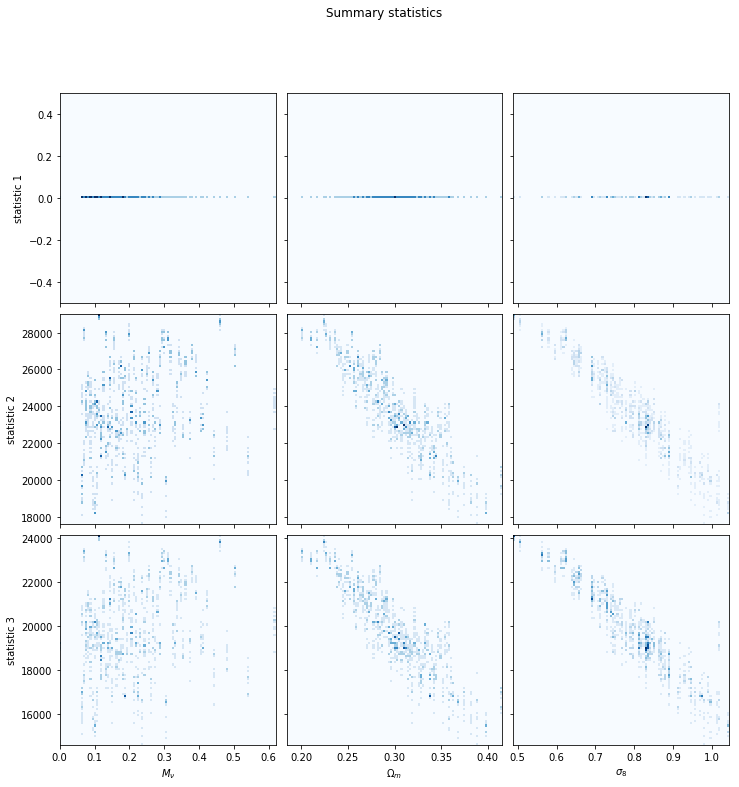

In [16]:
model.plot_summaries(testing_fn=test_fn,p=tp)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_whitened-b28f5ff/model.ckpt-18588
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


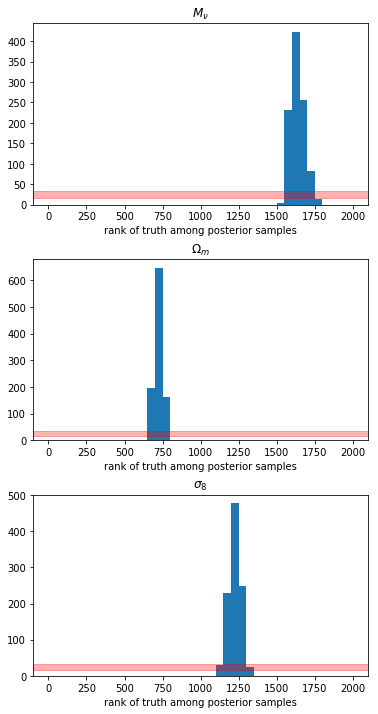

In [17]:
model.plot_ranks(testing_fn=test_fn,p=tp)

In [18]:
post = model.plot_posteriors(testing_fn=test_fn,p=tp,bounds=bounds)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/scratch/avirukt/models/noiseless_whitened-b28f5ff/model.ckpt-18588
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


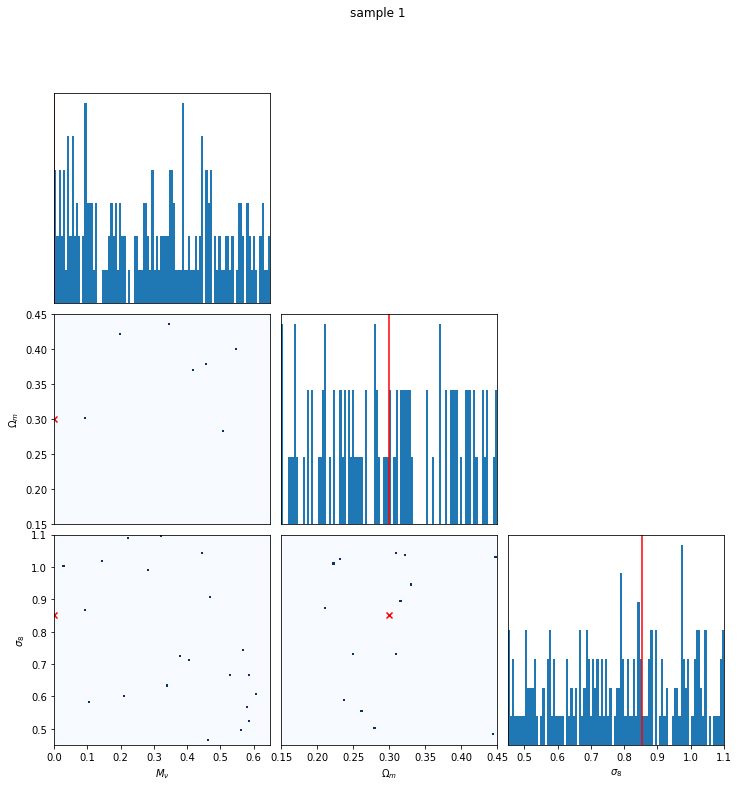

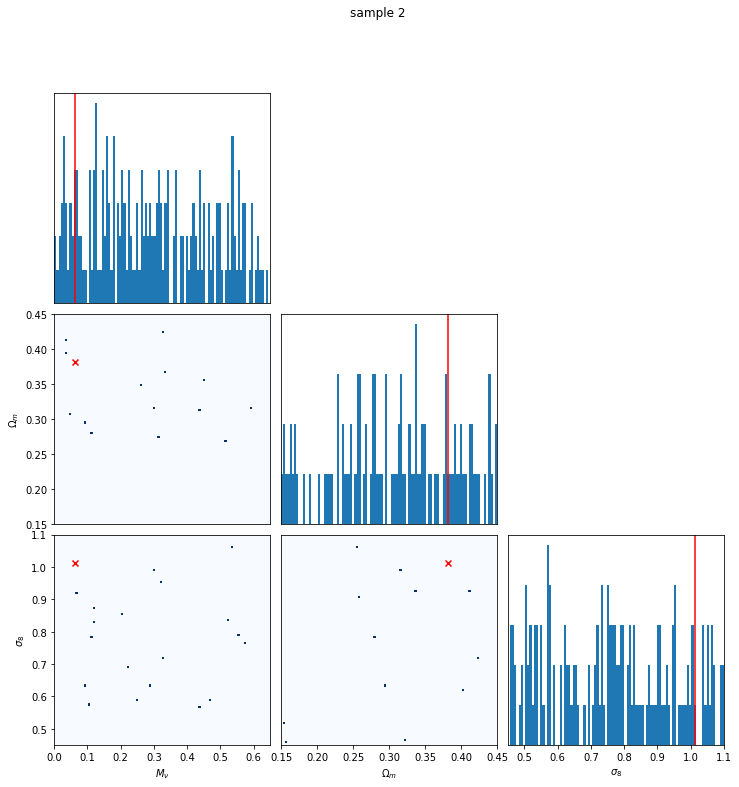

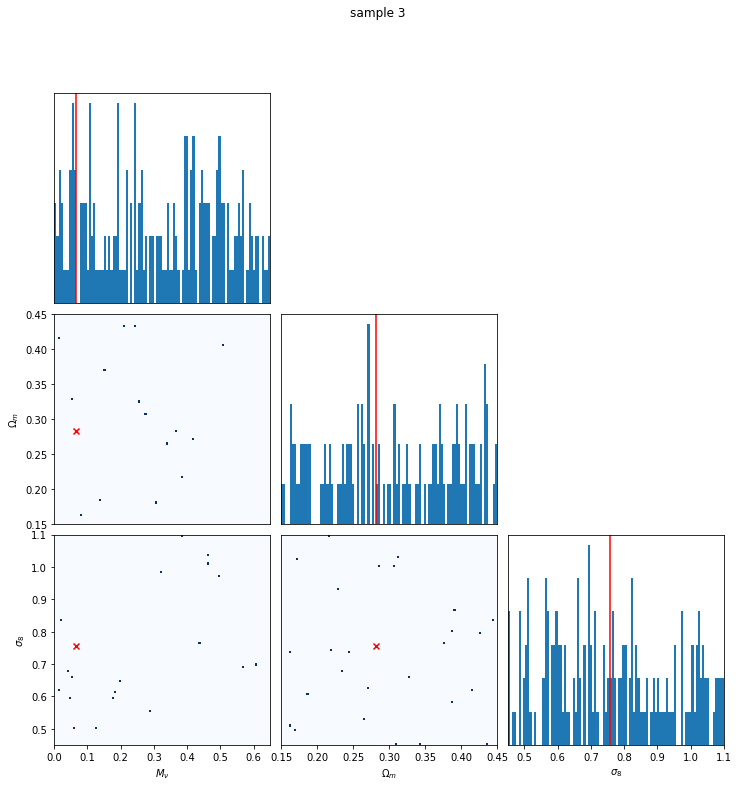

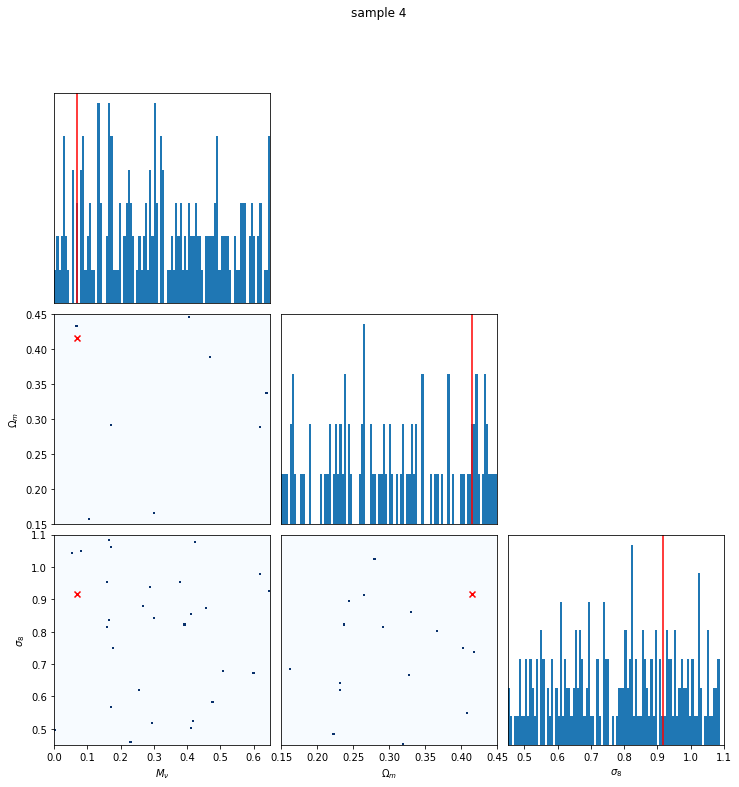

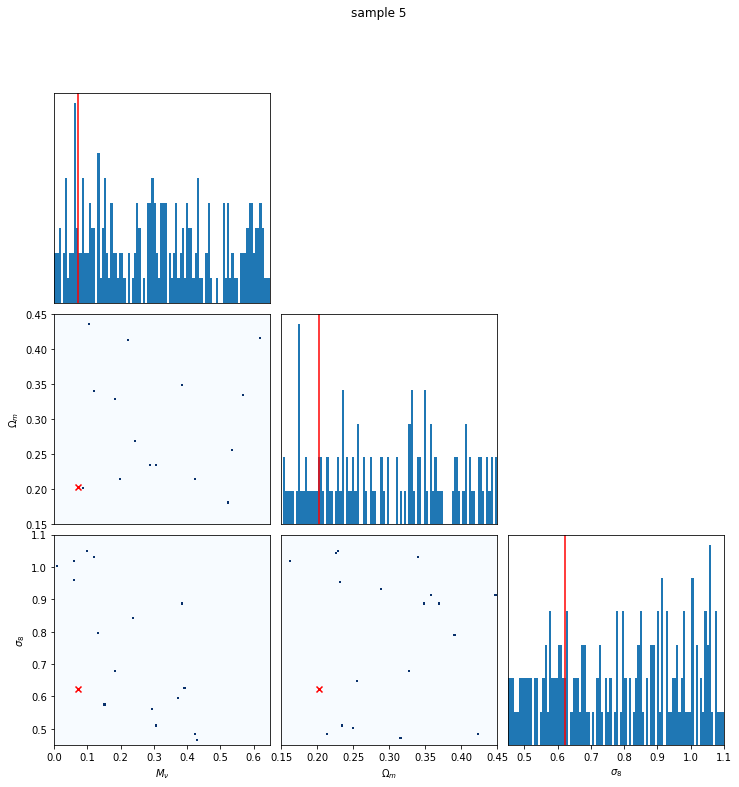

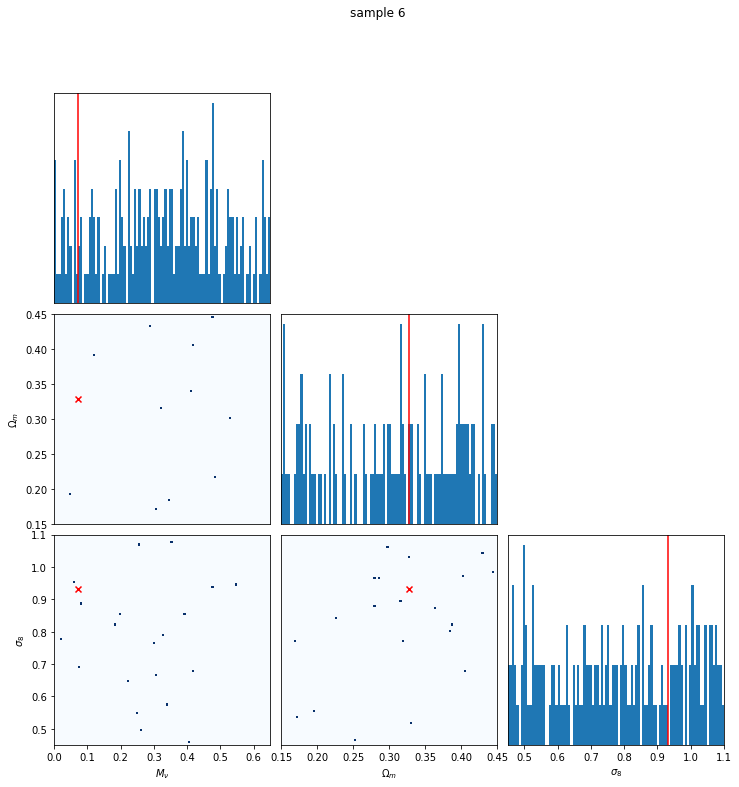

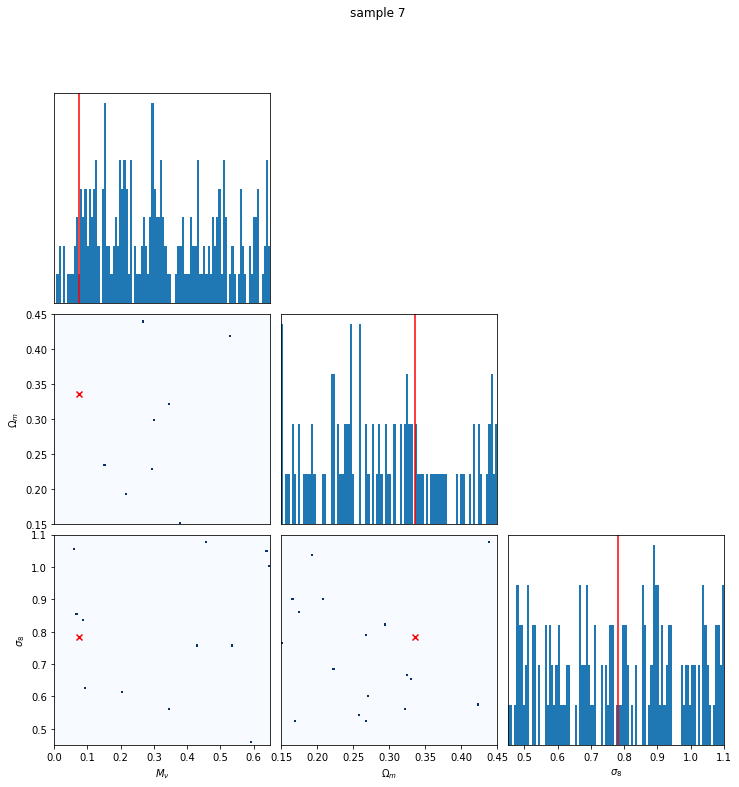

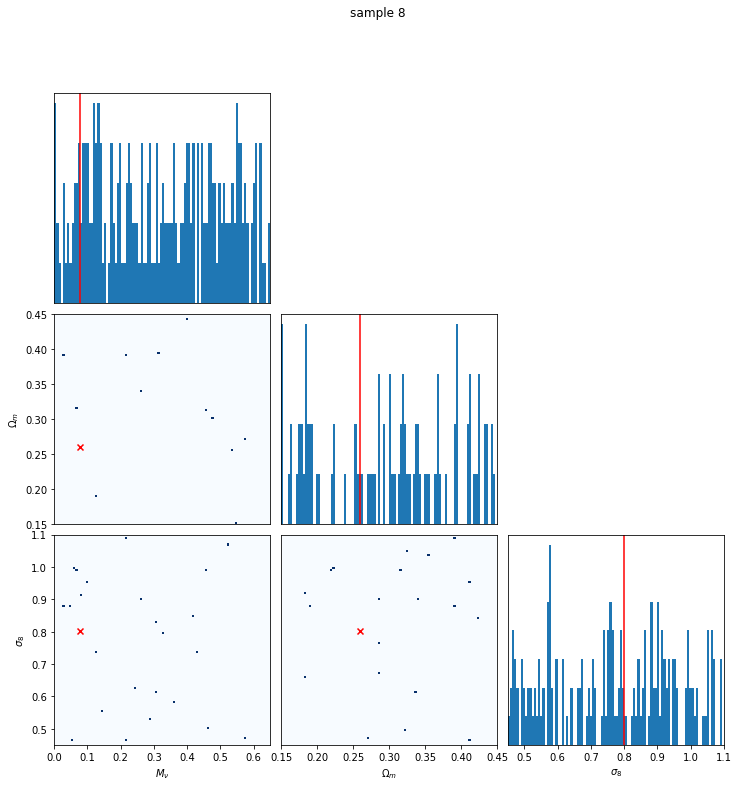

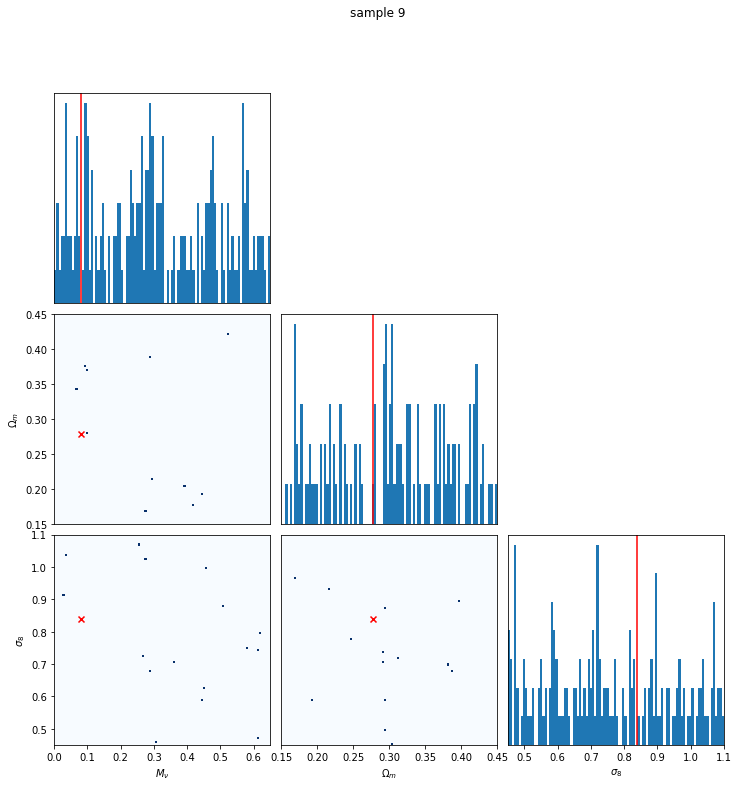

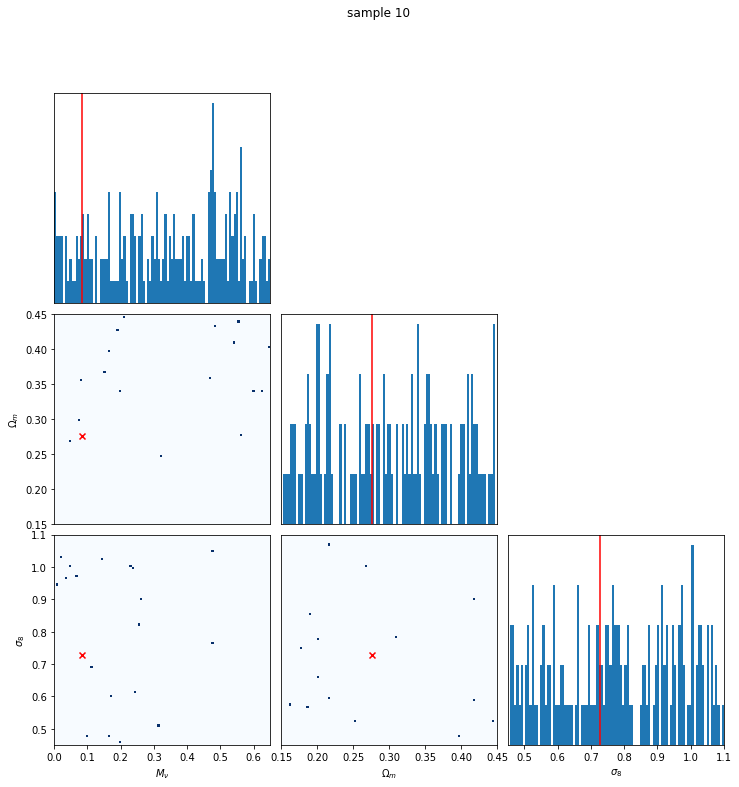

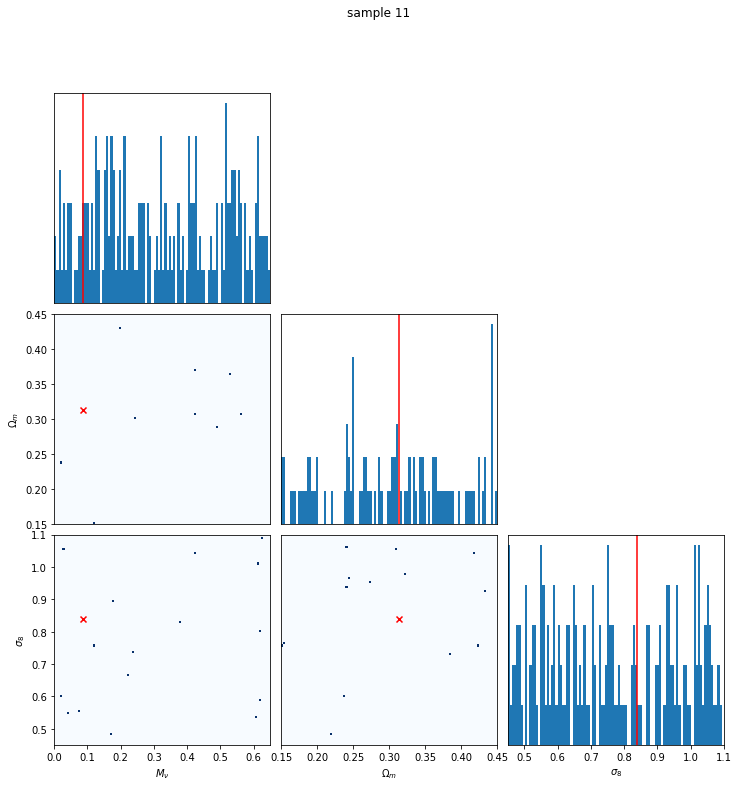

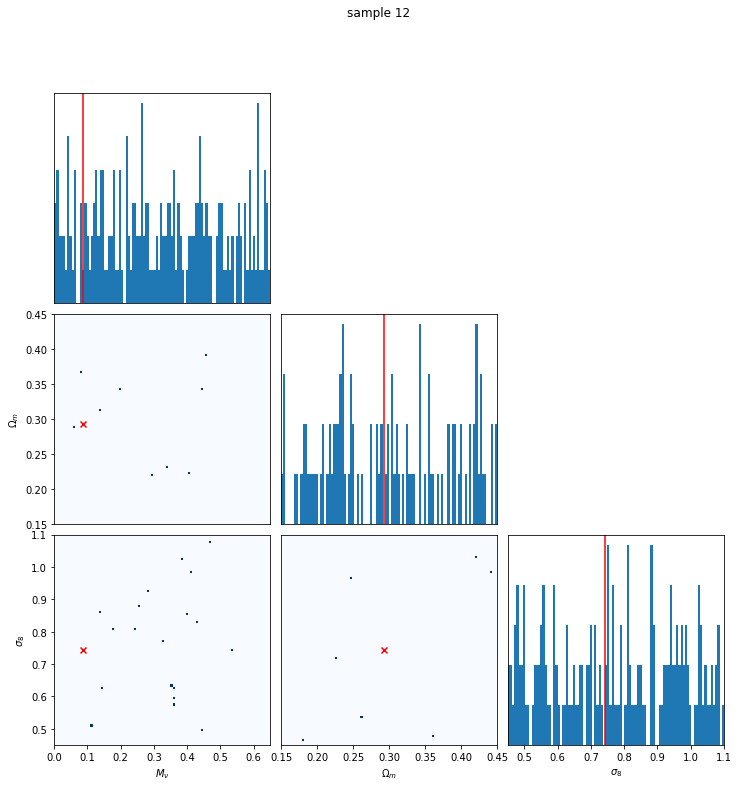

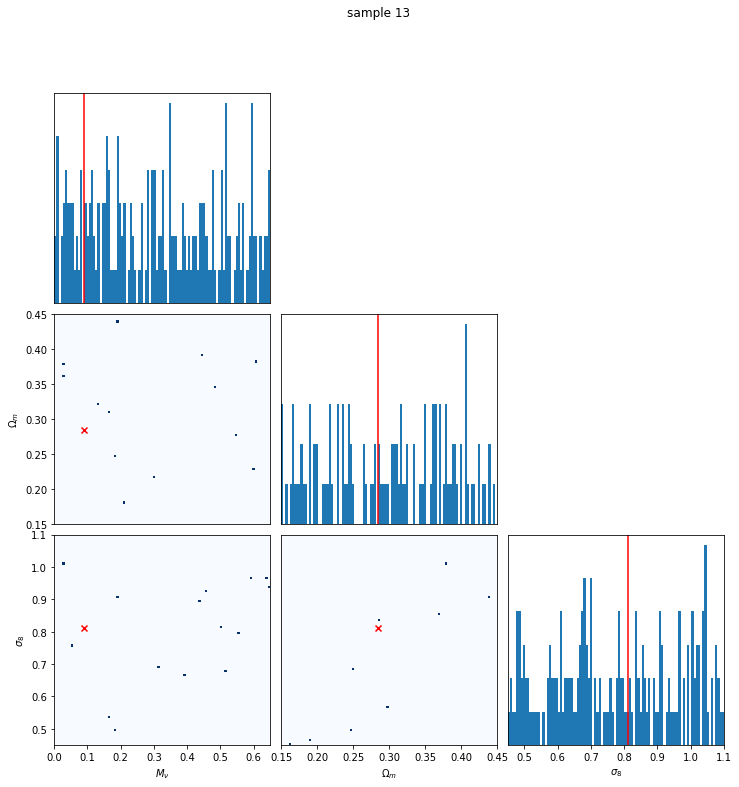

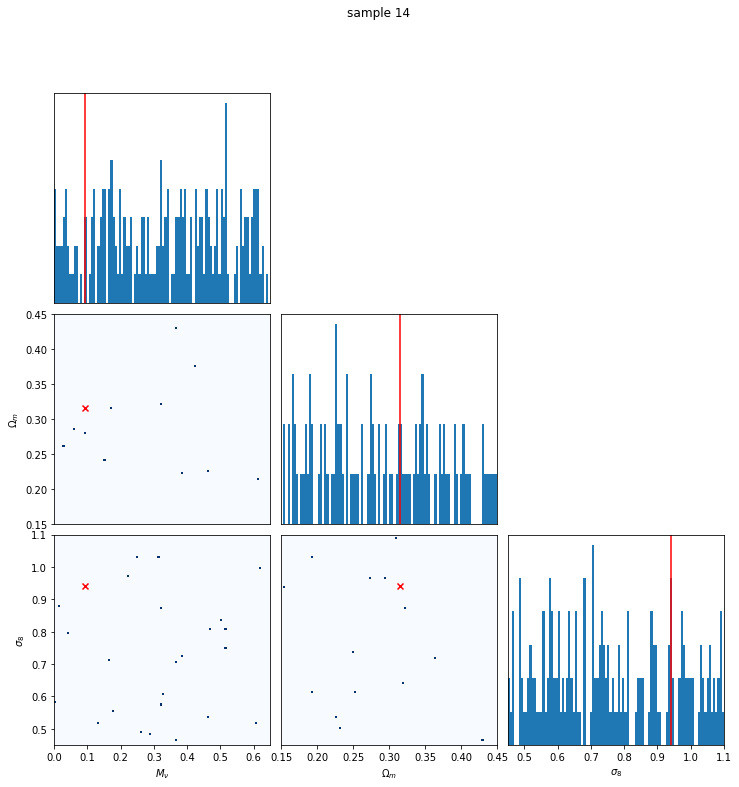

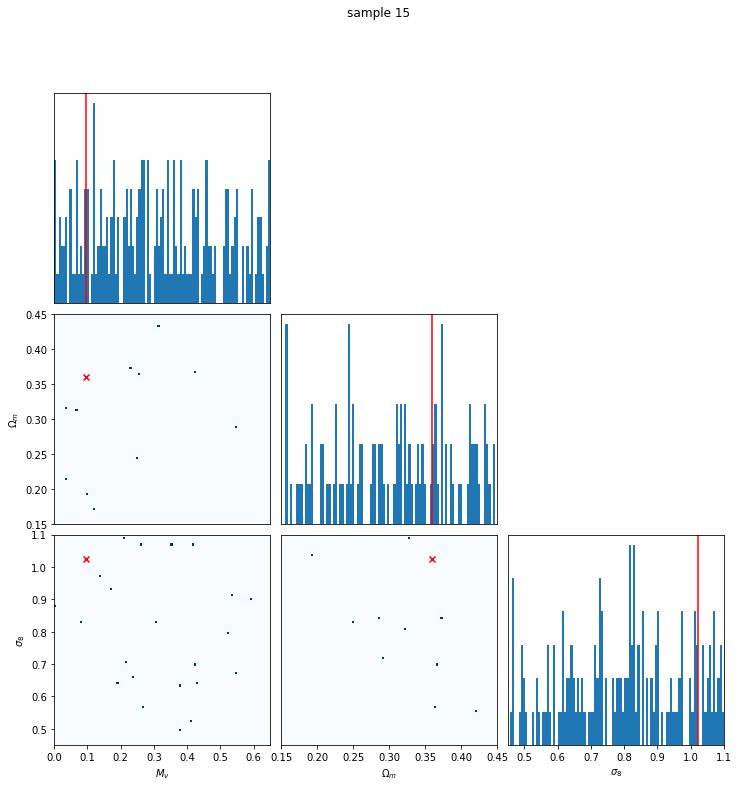

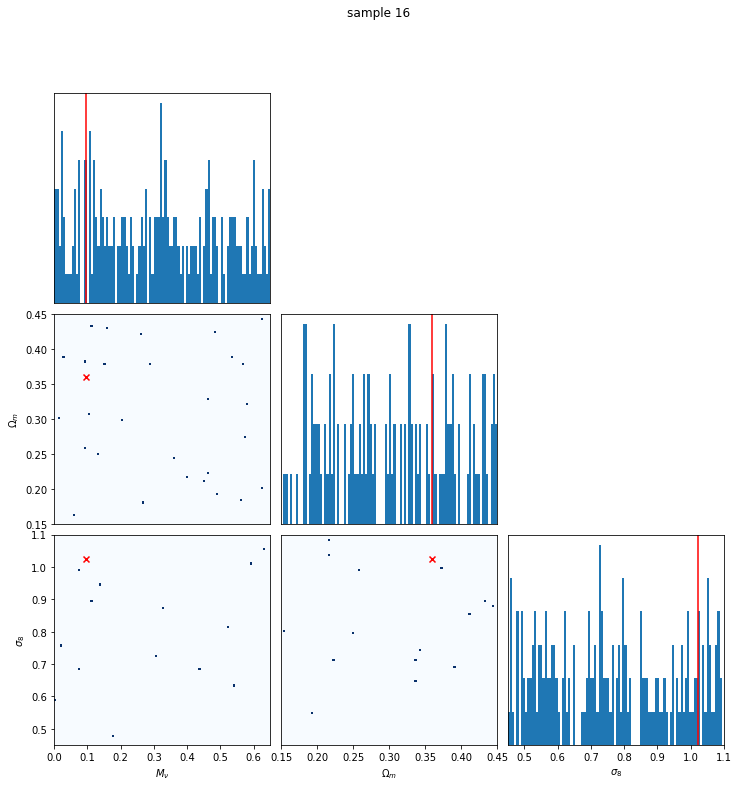

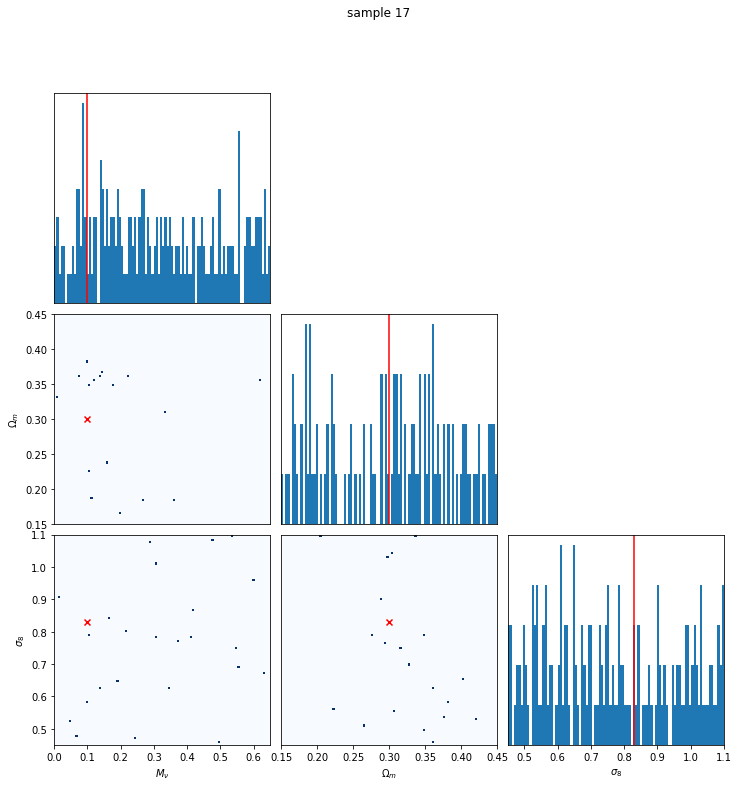

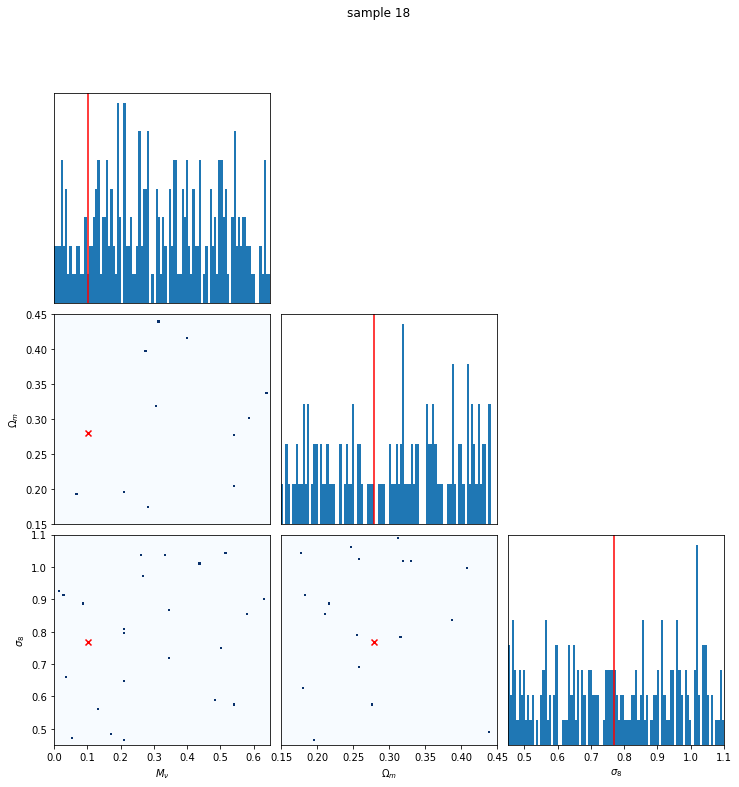

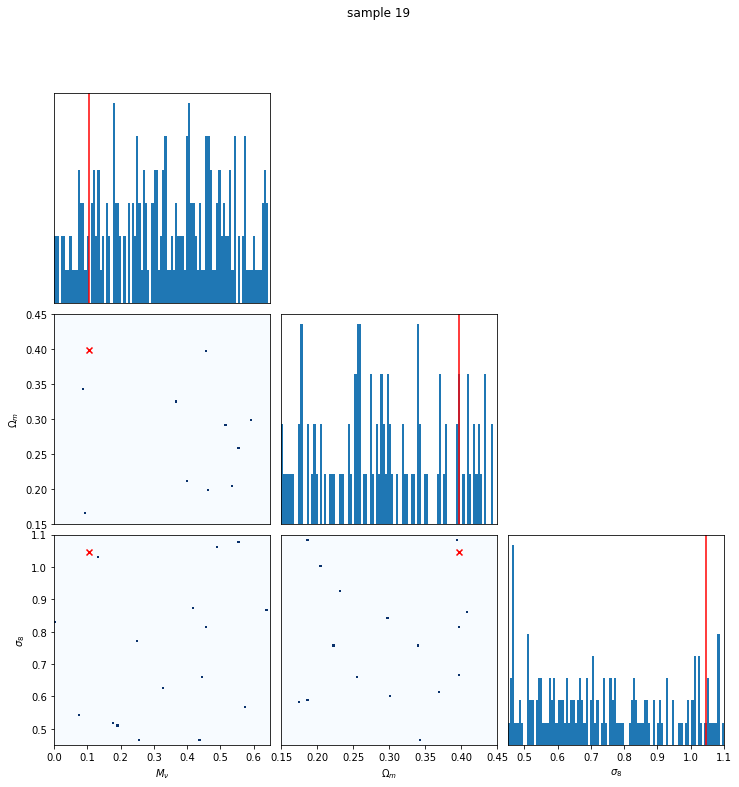

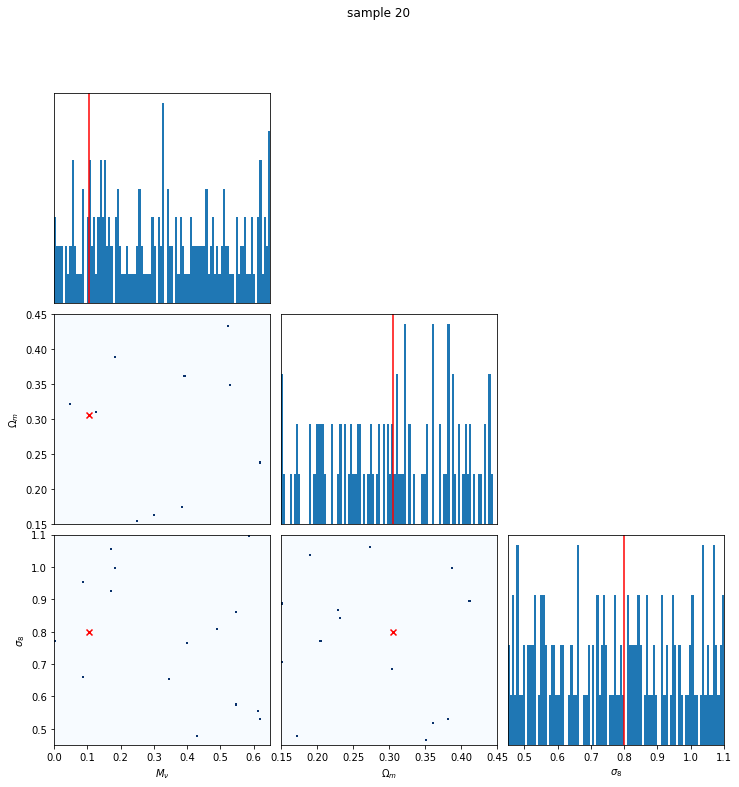

In [19]:
for i in range(20):
    next(post)